<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/G1/2_EyCD_Clasificacion_Tumoresferas_Grupo1_revision_Lu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>


[Link al github](https://github.com/luciabarg/datos_tumoresferas/tree/main)



<a name="exploratory_data_analysis"></a>
# **Práctico de Análisis Exploratorio y Curación**
  


Importamos las librerías necesarias:

In [149]:
#! pip install SQLAlchemy

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib
import matplotlib.pyplot as plt
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kurtosis
import scipy.stats
import math

# Ejemplo de una de las imágenes umbralizadas:
from IPython.display import Image

from sqlalchemy import create_engine, text

## Agrupaciones:

## SQL

Vamos a explorar los datos por medio de algunas consultas (queries) al archivo original (con el que trabajaron en el TP1):

 * Cargar el archivo *'data/raw/fiji_datos_0al7mo_labels.csv'* a SQLite.
 * Realizar las siguientes consultas:

## Usando SQL en Python:

In [151]:
## Para conectarse con sqlite:
engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=False)

# Levantamos el archivo
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)

#Ingesta el cvs a una tabla SQL
fiji_datos.to_sql('fiji_datos', con=engine, if_exists="replace")

1018


   ### 1) Verificar la cantidad de datos cargados (les debería dar 1018).


In [152]:
#Forma que les mostraron en la clase teórica:
    # Forma 1
query_1 = "SELECT count(*) FROM fiji_datos;"

with engine.connect() as con:
    print(query_1)
    rs_1 = con.execute(text(query_1))
    df_rs_1 = pd.DataFrame(rs_1.fetchall())
df_rs_1

SELECT count(*) FROM fiji_datos;


,count(*)
0,1018


In [153]:
# Otra forma alternativa de usar sqlalchemy en Python

query1 = " SELECT count(*) FROM fiji_datos; "
with engine.connect() as con:
  query_result1 = pd.read_sql_query(text(query1), con)

query_result1

,count(*)
0,1018




### 2.a) Listar las primeras 7 líneas con las columnas *'Area'*, *'Round'* con alias *'redondez'*, *Diameter* con alias *'diametro'*, *n_diam* con alias  *poblacion_celular* y *esferoide*.
     


In [154]:
query_2 = """
SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide
FROM fiji_datos
LIMIT 7;
"""
with engine.connect() as con:
    print(query_2)
    rs_2 = con.execute(text(query_2))
    df_rs_2 = pd.DataFrame(rs_2.fetchall())
df_rs_2.round(2)




SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide
FROM fiji_datos
LIMIT 7;



,Area,redondez,diametro,poblacion_celular,Esferoide
0,324.44,0.94,20.96,1.49,si
1,497.51,0.95,26.00,2.85,si
2,282.91,0.96,19.39,1.18,si
3,500.74,0.97,25.88,2.81,si
4,492.90,0.98,25.34,2.64,si
5,406.13,0.95,23.27,2.04,si
6,333.67,0.95,20.80,1.46,si


### 2.b) Realizar la misma consulta pero filtrando por los días 3 y 5.

In [155]:
query_2b =  """
SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide
FROM fiji_datos
WHERE dia IN (3, 5)
LIMIT 7;
"""
with engine.connect() as con:
    print(query_2b)
    rs_2b = con.execute(text(query_2b))
    df_rs_2b = pd.DataFrame(rs_2b.fetchall())
df_rs_2b.round(2)


SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide
FROM fiji_datos
WHERE dia IN (3, 5)
LIMIT 7;



,Area,redondez,diametro,poblacion_celular,Esferoide
0,4635.90,0.84,78.83,79.37,si
1,5901.83,0.95,87.74,109.47,si
2,11259.08,0.97,122.98,301.38,si
3,22344.17,0.74,173.24,842.57,si
4,2700.32,0.61,63.89,42.26,no
5,5002.34,0.83,84.10,96.38,si
6,14646.59,0.56,164.89,726.41,no


### 3) Consultar los distintos días y aparte las etiquetas presentes. Contar cuántas filas hay por día y luego consultar cuantas son *esferoide = 'si'*.   

Probar con GROUP BY de dos columnas si pueden contabilizar 'si' y 'no' por día.
    

In [156]:
query_3 =  """
SELECT dia,esferoide, COUNT(*) AS total_dias
FROM fiji_datos
GROUP BY dia,esferoide ;
"""
with engine.connect() as con:
    print(query_3)
    rs_3 = con.execute(text(query_3))
    df_rs_3 = pd.DataFrame(rs_3.fetchall())
df_rs_3.round(2)


SELECT dia,esferoide, COUNT(*) AS total_dias
FROM fiji_datos
GROUP BY dia,esferoide ;



,dia,Esferoide,total_dias
0,0,no,20
1,0,si,74
2,1,no,89
3,1,si,253
4,2,no,85
5,2,si,70
6,3,no,25
7,3,si,18
8,4,no,206
9,4,si,48


In [157]:
query_3b =  """
SELECT dia,esferoide, COUNT(*) AS total_dias
FROM fiji_datos
WHERE esferoide = 'si'
GROUP BY dia,esferoide ;
"""
with engine.connect() as con:
    print(query_3b)
    rs_3b = con.execute(text(query_3b))
    df_rs_3b = pd.DataFrame(rs_3b.fetchall())
df_rs_3b.round(2)


SELECT dia,esferoide, COUNT(*) AS total_dias
FROM fiji_datos
WHERE esferoide = 'si'
GROUP BY dia,esferoide ;



,dia,Esferoide,total_dias
0,0,si,74
1,1,si,253
2,2,si,70
3,3,si,18
4,4,si,48
5,5,si,28
6,6,si,2
7,7,si,29


### 4 ) En algún día en particular (a partir del 3er día), consultar cuántos datos:
        
* Son esferoides "si" y "no".        

* Tienen su diámetro entre 50 $\mu$m y 200$\mu$ m.

In [158]:
query_4 =  """
SELECT dia,esferoide, COUNT(*) AS total_esferoides, --total_dias,
       CASE
           WHEN Diameter >= 50 AND Diameter <= 200 THEN 'En rango'
           ELSE 'Fuera de rango'
       END AS rango_diametro
FROM fiji_datos
WHERE dia >= 3
GROUP BY dia,esferoide, rango_diametro;
"""
with engine.connect() as con:
    print(query_4)
    rs_4 = con.execute(text(query_4))
    df_rs_4 = pd.DataFrame(rs_4.fetchall())
df_rs_4.round(2)


SELECT dia,esferoide, COUNT(*) AS total_esferoides, --total_dias,
       CASE
           WHEN Diameter >= 50 AND Diameter <= 200 THEN 'En rango'
           ELSE 'Fuera de rango'
       END AS rango_diametro
FROM fiji_datos
WHERE dia >= 3
GROUP BY dia,esferoide, rango_diametro;



,dia,Esferoide,total_esferoides,rango_diametro
0,3,no,6,En rango
1,3,no,19,Fuera de rango
2,3,si,16,En rango
3,3,si,2,Fuera de rango
4,4,no,41,En rango
5,4,no,165,Fuera de rango
6,4,si,39,En rango
7,4,si,9,Fuera de rango
8,5,no,2,En rango
9,5,no,22,Fuera de rango


### También pueden usar la versión [**gráfica online**](https://sqliteonline.com/) de SQLite ([SQLite instructivo](https://drive.google.com/drive/folders/1iW5OaNaNDafU4e4m87xID7HcEbvb1W0V?usp=drive_link) )


Extras que podrían ayudar:

* Documentación [*pandas.DataFrame.to_sql*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) y [*pandas.read_sql_query*](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html).


* [Recursos SQL](https://drive.google.com/drive/folders/1EDSgMGbrRjNZX7m-GXunkQjNXUxY1NSn?usp=drive_link).
    
* Presentación en [MeTCamp](https://docs.google.com/presentation/d/1URSQt1sJ8Th8Y4J62zBv9x3I1lV0rckT/edit?usp=sharing&ouid=107018266094379471830&rtpof=true&sd=true).

* Súper súper buenas prácticas en [este repositorio](https://github.com/daianadte/wids-cba-2023).


## Python
Probar diferentes agrupaciones en Python.

In [159]:
# Identificamos los tipos de variables
tipos_datos = fiji_datos.dtypes
tipos_datos

labels         object
Area          float64
X             float64
Y             float64
XM            float64
YM            float64
Perim.        float64
BX            float64
BY            float64
Width         float64
Height        float64
Circ.         float64
Feret         float64
FeretX          int64
FeretY          int64
FeretAngle    float64
MinFeret      float64
AR            float64
Round         float64
Solidity      float64
Esferoide      object
dia             int64
Diameter      float64
n_diam        float64
dtype: object

In [160]:
# Identificamos los tipos de variables CATEGORICAS
variables_categoricas = tipos_datos[tipos_datos == 'object']
variables_categoricas

labels       object
Esferoide    object
dtype: object

In [161]:
# Identificamos los tipos de variables NUMERICAS
variables_numericas = tipos_datos[tipos_datos != 'object']
variables_numericas

Area          float64
X             float64
Y             float64
XM            float64
YM            float64
Perim.        float64
BX            float64
BY            float64
Width         float64
Height        float64
Circ.         float64
Feret         float64
FeretX          int64
FeretY          int64
FeretAngle    float64
MinFeret      float64
AR            float64
Round         float64
Solidity      float64
dia             int64
Diameter      float64
n_diam        float64
dtype: object

In [162]:
#Por ej:
fiji_datos.groupby('dia').agg({'Esferoide': ['count']}).sort_values(by = 'dia')

,Esferoide
,count
dia,
0,94
1,342
2,155
3,43
4,254
5,52
6,4
7,74


**[Lu]**

Perdón, como no puse que lo contaban en el group by de ejemplo, que sería el número de estructuras por día, no aclararon que buscaron con las diferentes agrupaciones. Poner leyenda de qué buscan contabilizar con las diferentes agrupaciones.

**[Lu]**

In [163]:
fiji_datos.groupby('Esferoide').size()

Esferoide
no    496
si    522
dtype: int64

In [164]:
fiji_datos.groupby('Esferoide').agg({'Esferoide': 'count'}).apply(lambda x: (x<500).sum())

Esferoide    1
dtype: int64

In [165]:
fiji_datos.groupby(['dia', 'Esferoide']).agg({'dia': 'count'})

dia
dia Esferoide     
0   no          20
    si          74
1   no          89
    si         253
2   no          85
    si          70
3   no          25
    si          18
4   no         206
    si          48
5   no          24
    si          28
6   no           2
    si           2
7   no          45
    si          29

In [166]:
fiji_datos.groupby(['dia', 'Esferoide']).agg({'Area': 'mean','Esferoide': 'count'}).round(2)

Area  Esferoide
dia Esferoide                    
0   no          726.56         20
    si          407.97         74
1   no         1065.94         89
    si          791.58        253
2   no          976.08         85
    si         3121.03         70
3   no         2286.87         25
    si         8567.56         18
4   no         1656.71        206
    si         7232.57         48
5   no          952.43         24
    si         9822.18         28
6   no         1430.46          2
    si         1430.46          2
7   no          545.20         45
    si         3954.69         29

In [167]:
fiji_datos.groupby(['dia', 'Esferoide']).agg({'Circ.': 'mean','Esferoide': 'count'}).round(2)

Circ.  Esferoide
dia Esferoide                  
0   no          0.67         20
    si          0.91         74
1   no          0.78         89
    si          0.85        253
2   no          0.83         85
    si          0.81         70
3   no          0.83         25
    si          0.82         18
4   no          0.83        206
    si          0.83         48
5   no          0.84         24
    si          0.81         28
6   no          0.88          2
    si          0.88          2
7   no          0.82         45
    si          0.77         29

In [168]:
fiji_datos.groupby(['dia', 'Esferoide']).agg({'Round': 'mean','Esferoide': 'count'}).round(2)

Round  Esferoide
dia Esferoide                  
0   no          0.52         20
    si          0.95         74
1   no          0.75         89
    si          0.84        253
2   no          0.80         85
    si          0.86         70
3   no          0.81         25
    si          0.87         18
4   no          0.84        206
    si          0.90         48
5   no          0.85         24
    si          0.90         28
6   no          0.94          2
    si          0.94          2
7   no          0.82         45
    si          0.90         29

In [169]:
# Realizar el groupby para esferoides "si" y calcular la media del Round
agrupado_dia_esfsi = fiji_datos.groupby(['dia'], ['Esferoide']=='si').agg({'Round': 'mean','Esferoide': 'count'}).round(2)
agrupado_dia_esfsi

,Round,Esferoide
dia,,
0,0.86,94
1,0.82,342
2,0.82,155
3,0.83,43
4,0.85,254
5,0.88,52
6,0.94,4
7,0.85,74


In [170]:
fiji_datos.groupby(['dia', 'Esferoide']).agg({'Diameter': 'mean','Esferoide': 'count'}).round(2)

Diameter  Esferoide
dia Esferoide                     
0   no            32.20         20
    si            23.15         74
1   no            36.39         89
    si            31.78        253
2   no            34.31         85
    si            60.69         70
3   no            47.16         25
    si           101.09         18
4   no            39.86        206
    si            89.69         48
5   no            33.63         24
    si           110.21         28
6   no            43.22          2
    si            43.22          2
7   no            25.01         45
    si            69.84         29

## Análisis y Curación de Datos

### 1) Para empezar a trabajar la tabla, primero hay que combinar los datasets, que fueron separados por día.

Estos son los siguientes archivos a unir:

*   "fiji_datos_0al7mo_modificado_dia_0.csv"
*   "fiji_datos_0al7mo_modificado_dia_1.csv"
*   "fiji_datos_0al7mo_modificado_dia_2.csv"
*   "fiji_datos_0al7mo_modificado_dia_3.csv"
*   "fiji_datos_0al7mo_modificado_dia_4.csv"
*   "fiji_datos_0al7mo_modificado_dia_5.csv"
*   "fiji_datos_0al7mo_modificado_dia_6.csv"
*   "fiji_datos_0al7mo_modificado_dia_7a.csv"
*   "fiji_datos_0al7mo_modificado_dia_7b.csv"

Se encuentran en la carpeta: **"data/02_EyC"** de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link) y en este repositorio.


Probar hacerlo con Python y/o SQL (por separado, para probar!). Verificar que llegan a la misma cantidad de filas y columnas.


## SQL

**[Lu]**

Solo para que sepan, no es necesario reinicializar el engine de SQLAlchemy cada vez que se quiere guardar datos en una nueva tabla.

Cada vez que se llama a to_sql() con un nombre de tabla diferente, los datos se guardan en una tabla separada en la misma base de datos SQLite. Y si ponen *index = False* no da info de más.

**[Lu]**

In [171]:
## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
# Levantamos el archivo
url_0 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_0.csv'
fiji_datos_0 = pd.read_csv(url_0, sep=';')
fiji_datos_0.to_sql('fiji_datos_0', con=engine, if_exists="replace", index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
# Levantamos el archivo
url_1 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_1.csv'
fiji_datos_1 = pd.read_csv(url_1, sep=',')
fiji_datos_1.to_sql('fiji_datos_1', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
# Levantamos el archivo
url_2 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_2.csv'
fiji_datos_2 = pd.read_csv(url_2, sep=';')
fiji_datos_2.to_sql('fiji_datos_2', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
url_3 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_3.csv'
fiji_datos_3 = pd.read_csv(url_3, sep=';')
fiji_datos_3.to_sql('fiji_datos_3', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
url_4 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_4.csv'
fiji_datos_4 = pd.read_csv(url_4, sep=':')
fiji_datos_4.to_sql('fiji_datos_4', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
url_5 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_5.csv'
fiji_datos_5 = pd.read_csv(url_5, sep=';')
fiji_datos_5.to_sql('fiji_datos_5', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
url_6 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_6.csv'
fiji_datos_6 = pd.read_csv(url_6, sep=',')
fiji_datos_6.to_sql('fiji_datos_6', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
url_7a = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7a.csv'
fiji_datos_7a = pd.read_csv(url_7a, sep=',')
fiji_datos_7a.to_sql('fiji_datos_7a', con=engine, if_exists="replace",index=False)

## Para conectarse con sqlite:
#engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)
url_7b = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7b.csv'
fiji_datos_7b = pd.read_csv(url_7b, sep=';')
fiji_datos_7b.to_sql('fiji_datos_7b', con=engine, if_exists="replace",index=False)

88

Realizamos una visualización general de cada una de las tablas

In [172]:
query0 = f"""
    SELECT * FROM fiji_datos_0
"""

with engine.connect() as con:
    print(query0)
    rs0 = con.execute(text(query0))
    df_rs0 = pd.DataFrame(rs0.fetchall())
    # print(df_rs)
df_rs0.head()


    SELECT * FROM fiji_datos_0



,Unnamed: 0,labels,Area,X,Y,XM,YM,Perim.,BX,BY,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,49,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,6,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,27,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,78,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,41,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


In [173]:
query1 = """
SELECT *
FROM fiji_datos_1
"""

with engine.connect() as con:
    print(query1)
    rs1 = con.execute(text(query1))
    df_rs1 = pd.DataFrame(rs1.fetchall())
    # print(df_rs)
df_rs1.head()


SELECT *
FROM fiji_datos_1



,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_1_well_1_100X_1_blob_6,515.5105,764.1602,86.5956,764.1602,86.5956,94.5625,752.0380,69.9728,24.4565,...,149,59.4208,19.2591,1.9824,0.5044,0.8990,si,1,26.98950,3.185782
1,Esferas_BT474_dia_1_well_2_100X_2_blob_61,1207.3192,811.3922,778.9824,811.3922,778.9824,131.0424,791.4402,759.5109,40.0815,...,1121,123.4248,38.7228,1.0373,0.9640,0.9682,si,1,39.71065,10.147347
2,Esferas_BT474_dia_1_well_2_100X_1_blob_20,475.3589,1465.0499,791.3894,1465.0499,791.3894,81.8397,1452.4457,779.2120,25.8152,...,1157,157.3801,24.2621,1.0763,0.9291,0.9519,si,1,25.37835,2.648632
3,Esferas_BT474_dia_1_well_1_100X_1_blob_90,1349.4654,1227.9468,855.2971,1227.9468,855.2971,143.1058,1207.8804,832.2011,41.4402,...,1287,65.7723,39.8361,1.0983,0.9105,0.9475,si,1,42.26695,12.235853
4,Esferas_BT474_dia_1_well_2_100X_2_blob_1,914.7197,75.1605,24.8651,75.1605,24.8651,113.9139,57.0652,8.8315,36.6848,...,26,158.9625,31.9293,1.1711,0.8539,0.9640,si,1,34.88910,6.881781


In [174]:
query2 = """
SELECT *
FROM fiji_datos_1
"""

with engine.connect() as con:
    print(query2)
    rs2 = con.execute(text(query2))
    df_rs2 = pd.DataFrame(rs2.fetchall())
    # print(df_rs)
df_rs2.head()


SELECT *
FROM fiji_datos_1



,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_1_well_1_100X_1_blob_6,515.5105,764.1602,86.5956,764.1602,86.5956,94.5625,752.0380,69.9728,24.4565,...,149,59.4208,19.2591,1.9824,0.5044,0.8990,si,1,26.98950,3.185782
1,Esferas_BT474_dia_1_well_2_100X_2_blob_61,1207.3192,811.3922,778.9824,811.3922,778.9824,131.0424,791.4402,759.5109,40.0815,...,1121,123.4248,38.7228,1.0373,0.9640,0.9682,si,1,39.71065,10.147347
2,Esferas_BT474_dia_1_well_2_100X_1_blob_20,475.3589,1465.0499,791.3894,1465.0499,791.3894,81.8397,1452.4457,779.2120,25.8152,...,1157,157.3801,24.2621,1.0763,0.9291,0.9519,si,1,25.37835,2.648632
3,Esferas_BT474_dia_1_well_1_100X_1_blob_90,1349.4654,1227.9468,855.2971,1227.9468,855.2971,143.1058,1207.8804,832.2011,41.4402,...,1287,65.7723,39.8361,1.0983,0.9105,0.9475,si,1,42.26695,12.235853
4,Esferas_BT474_dia_1_well_2_100X_2_blob_1,914.7197,75.1605,24.8651,75.1605,24.8651,113.9139,57.0652,8.8315,36.6848,...,26,158.9625,31.9293,1.1711,0.8539,0.9640,si,1,34.88910,6.881781


In [175]:
query3 = """
SELECT *
FROM fiji_datos_3
"""

with engine.connect() as con:
    print(query3)
    rs3 = con.execute(text(query3))
    df_rs3 = pd.DataFrame(rs3.fetchall())
    # print(df_rs)
df_rs3.head()


SELECT *
FROM fiji_datos_3



,Unnamed: 0,labels,Area,X,Y,XM,YM,Perim.,BX,BY,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,625,Esferas_BT474_dia_3_well_2_100X_5_blob_5,526.1254,1133.0777,1164.0536,1133.0777,1164.0536,87.1379,1119.5652,1150.1359,...,1695,124.0459,22.0971,1.3102,0.7633,0.9552,no,3,26.21645,2.919800
1,597,Esferas_BT474_dia_3_well_2_100X_3_blob_2,14646.5914,1014.4278,807.4839,1014.4278,807.4839,606.5156,956.5217,698.3696,...,1030,106.6287,118.4902,1.7856,0.5600,0.8462,no,3,164.88585,726.409779
2,619,Esferas_BT474_dia_3_well_2_100X_4_blob_4,6835.9375,1182.4718,1074.3251,1182.4718,1074.3251,322.9813,1130.4348,1027.1739,...,1521,141.3944,78.8385,1.4369,0.6959,0.9725,no,3,95.49115,141.098011
3,604,Esferas_BT474_dia_3_well_2_100X_5_blob_4,1025.0214,998.1092,1163.0063,998.1092,1163.0063,119.6783,980.9783,1144.0217,...,1686,121.7989,34.5867,1.1583,0.8633,0.9688,si,3,37.27645,8.393347
4,608,Esferas_BT474_dia_3_well_1_100X_4_blob_1,5457.8583,717.9765,302.0100,717.9765,302.0100,312.5497,663.0435,263.5870,...,411,156.3706,77.3172,1.3316,0.7510,0.9267,si,3,92.04795,126.378700


In [176]:
query4 = """
SELECT *
FROM fiji_datos_4
"""

with engine.connect() as con:
    print(query4)
    rs4 = con.execute(text(query4))
    df_rs4 = pd.DataFrame(rs4.fetchall())
    # print(df_rs)
df_rs4.head()


SELECT *
FROM fiji_datos_4



,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_4_well_1_100X_11_blob_2,1956.8171,1334.3324,147.4299,1334.3324,147.4299,180.3134,1309.1033,118.8859,48.9130,...,175,109.9831,48.9130,1.1047,0.9052,0.9472,no,4,52.28695,23.163888
1,Esferas_BT474_dia_4_well_1_100X_11_blob_1,294.4456,1360.0959,121.5830,1360.0959,121.5830,77.1325,1351.2228,110.7337,19.0217,...,199,69.0755,18.9591,1.1768,0.8498,0.8698,no,4,21.84385,1.688959
2,Esferas_BT474_dia_4_well_1_100X_13_blob_7,5869.9898,284.9616,872.3687,284.9616,872.3687,291.5099,239.1304,829.4837,91.0326,...,1310,24.8637,84.2865,1.0738,0.9313,0.9763,si,4,88.19130,111.149817
3,Esferas_BT474_dia_4_well_2_100X_1_blob_12,435.2072,700.4094,381.8407,700.4094,381.8407,91.4471,684.1033,370.9239,29.8913,...,558,160.3462,19.9986,1.5549,0.6431,0.8972,no,4,25.14815,2.577209
4,Esferas_BT474_dia_4_well_2_100X_1_blob_25,2542.9392,957.1504,885.0622,957.1504,885.0622,191.2513,930.7065,855.9783,55.0272,...,1264,126.7475,53.2775,1.1493,0.8701,0.9753,si,4,58.43230,32.328865


In [177]:
query5 = """
SELECT *
FROM fiji_datos_5
"""

with engine.connect() as con:
    print(query5)
    rs5 = con.execute(text(query5))
    df_rs5 = pd.DataFrame(rs5.fetchall())
    # print(df_rs)
df_rs5.head()


SELECT *
FROM fiji_datos_5



,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_5_well_2_100X_6_blob_1,9974.2291,930.1092,819.7563,930.1092,819.7563,388.0339,876.3587,761.5489,108.0163,...,1270,47.0700,108.0163,1.0596,0.9438,0.9742,si,5,113.85345,239.149846
1,Esferas_BT474_dia_5_well_2_100X_1_blob_4,150.4534,272.4268,1137.9118,272.4268,1137.9118,46.7184,265.6250,1130.4348,12.9076,...,1686,72.3499,12.9076,1.1320,0.8834,0.9341,no,5,14.29580,0.473431
2,Esferas_BT474_dia_5_well_2_100X_5_blob_1,513.2030,1018.2245,350.9290,1018.2245,350.9290,84.5571,1005.4348,338.3152,25.8152,...,501,125.7067,25.7479,1.0159,0.9843,0.9586,no,5,26.25985,2.934325
3,Esferas_BT474_dia_5_well_1_100X_2_blob_8,1011.1760,1310.4739,1244.2510,1310.4739,1244.2510,118.7176,1291.4402,1226.2228,37.3641,...,1829,168.6901,35.0171,1.0841,0.9225,0.9673,no,5,36.56060,7.919020
4,Esferas_BT474_dia_5_well_1_100X_2_blob_5,356.2884,649.6334,284.7004,649.6334,284.7004,69.5149,639.2663,274.4565,21.0598,...,426,26.5651,21.0598,1.0173,0.9830,0.9560,no,5,21.92290,1.707362


In [178]:
query6 = """
SELECT *
FROM fiji_datos_6
"""

with engine.connect() as con:
    print(query6)
    rs6 = con.execute(text(query6))
    df_rs6 = pd.DataFrame(rs6.fetchall())
    # print(df_rs)
df_rs6.head()


SELECT *
FROM fiji_datos_6



,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_6_well_1_100X_11_blob_1,989.4849,413.2837,227.5074,413.2837,227.5074,119.0473,394.7011,208.5598,36.6848,...,329,163.4956,34.3726,1.0725,0.9324,0.9593,si,6,36.3169,7.761717
1,Esferas_BT474_dia_6_well_1_100X_12_blob_1,1871.4371,436.3898,282.3171,436.3898,282.3171,162.8552,412.3641,258.1522,48.2337,...,441,48.6745,47.7822,1.0654,0.9387,0.9758,si,6,50.1253,20.408095
2,Esferas_BT474_dia_6_well_1_100X_11_blob_1,989.4849,413.2837,227.5074,413.2837,227.5074,119.0473,394.7011,208.5598,36.6848,...,329,163.4956,34.3726,1.0725,0.9324,0.9593,no,6,36.3169,7.761717
3,Esferas_BT474_dia_6_well_1_100X_12_blob_1,1871.4371,436.3898,282.3171,436.3898,282.3171,162.8552,412.3641,258.1522,48.2337,...,441,48.6745,47.7822,1.0654,0.9387,0.9758,no,6,50.1253,20.408095


In [179]:
query7a = """
SELECT *
FROM fiji_datos_7a
"""

with engine.connect() as con:
    print(query7a)
    rs7a = con.execute(text(query7a))
    df_rs7a = pd.DataFrame(rs7a.fetchall())
    # print(df_rs)
df_rs7a.head()


SELECT *
FROM fiji_datos_7a



,Unnamed: 0,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Circ.
0,1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,11.5489,0.9163
1,1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,25.8152,0.9076
2,1009,Esferas_BT474_dia_7_well_2_100X_3_blob_3,334.1358,774.1384,193.5513,774.1384,193.5513,69.5832,762.2283,185.4620,23.7772,16.9837,0.8672
3,992,Esferas_BT474_dia_7_well_1_100X_8_blob_3,3145.2143,477.0000,293.5050,477.0000,293.5050,249.8966,436.8207,264.9457,78.8043,54.3478,0.6329
4,981,Esferas_BT474_dia_7_well_1_100X_3_blob_1,381.6716,577.3664,277.3123,577.3664,277.3123,73.1930,566.5761,266.3043,21.7391,22.4185,0.8953


In [180]:
query7b = """
SELECT *
FROM fiji_datos_7b
"""

with engine.connect() as con:
    print(query7b)
    rs7b = con.execute(text(query7b))
    df_rs7b = pd.DataFrame(rs7b.fetchall())
    # print(df_rs)
df_rs7b.head()


SELECT *
FROM fiji_datos_7b



,Unnamed: 0,labels,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,13.0675,957,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,27.0718,176,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
2,1009,Esferas_BT474_dia_7_well_2_100X_3_blob_3,24.5507,1122,282,165.5792,16.9837,1.3648,0.7327,0.9602,no,7,20.76720,1.451327
3,992,Esferas_BT474_dia_7_well_1_100X_8_blob_3,79.0412,643,435,175.5635,52.1486,1.5889,0.6294,0.9155,no,7,65.59490,45.734269
4,981,Esferas_BT474_dia_7_well_1_100X_3_blob_1,25.1450,838,423,51.5819,21.4829,1.1471,0.8718,0.9550,no,7,23.31395,2.053426


**[Lu]**

Estuvo bueno que los puedan levantar y observar. Igual con todo lo que salía era fácil perderse. La idea era que levanten con sql, juntar los distintos días y luego hacer las transformaciones.

Pero... en realidad acá están levantando el archivo desde una url con pandas (con *df = pd.read_csv(url)*) y luego cargando en una base de datos (haciendo *df.to_sql*) para poder consultarlo. En el ejemplo de abajo pueden notar eso.

Así que usaremos los comandos de SQL luego del análisis de Python así les queda al menos.



**[Lu]**

Ejemplo de dataframe a tabla:

In [181]:
fiji_datos_0 = pd.read_csv(url_0, sep=';')
# acá ya lo pasaron a pandas. Como se dieron cuenta mas adelante, tienen las columnas 'Unnamed: 0' de más.
# Entonces acá toca trabajar con pandas para elimnar tales columnas, como lo hacen mas adelante:
fiji_datos_0.drop('Unnamed: 0', axis=1, inplace=True)

In [182]:
# Pero toca devolverlo a la base de datos para poder usarlo en la query:
fiji_datos_0.to_sql('fiji_datos_0', con=engine, if_exists="replace", index = False)

110

In [183]:
query0 = f"""
    SELECT * FROM fiji_datos_0
"""

with engine.connect() as con:
    print(query0)
    rs0 = con.execute(text(query0))
    df_rs0 = pd.DataFrame(rs0.fetchall())
    print(df_rs0.shape)
df_rs0.head()


    SELECT * FROM fiji_datos_0

(110, 24)


,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


## PYTHON

In [184]:
dia0 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_0.csv', sep=';')
dia1 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_1.csv', sep=',')
dia2 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_2.csv', sep=';')
dia3 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_3.csv', sep=';')
dia4 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_4.csv', sep=':')
dia5 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_5.csv', sep=';')
dia6 = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_6.csv', sep=',')
dia7a = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7a.csv', sep=',')
dia7b = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7b.csv', sep=';')

In [185]:
dia7a.columns

Index(['Unnamed: 0', 'labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Circ.'],
      dtype='object')

In [186]:
dia7b.columns

Index(['Unnamed: 0', 'labels', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object')

In [187]:
###Veamos el shape de cada df
# Lista con df's
dfs = [dia0, dia1, dia2, dia3, dia4, dia5, dia6, dia7a, dia7b]
# Iterar sobre cada df en la lista
for i, df in enumerate(dfs):
    print("Leyendo DataFrame número", i)
    print("Shape del DataFrame:", df.shape)
    i=i+1
    print()


Leyendo DataFrame número 0
Shape del DataFrame: (110, 25)

Leyendo DataFrame número 1
Shape del DataFrame: (395, 24)

Leyendo DataFrame número 2
Shape del DataFrame: (172, 24)

Leyendo DataFrame número 3
Shape del DataFrame: (50, 25)

Leyendo DataFrame número 4
Shape del DataFrame: (295, 24)

Leyendo DataFrame número 5
Shape del DataFrame: (57, 24)

Leyendo DataFrame número 6
Shape del DataFrame: (4, 24)

Leyendo DataFrame número 7
Shape del DataFrame: (88, 13)

Leyendo DataFrame número 8
Shape del DataFrame: (88, 14)



Se detectaron columnas "Unnamed" en las siguientes tablas:

* fiji_datos_0
* fiji_datos_3
* fiji_datos_7a
* fiji_datos_7b


- Se observa que algunos data frame como el dia0 y dia3 tienen una culumna más comparado a los días 1, 2, 4, 5 y 6...Lo cual eso es algo a investigar y ver qué columnas demás tienen 0 y 3 que no estan en los otros mencionados.
- Respecto a 7a y 7b son muy distintos a los dataframes anteriores, asi que toca ver en qué radica esa diferencia y porqué solo tienen 13 y 14 columnas y cuál es la diferencias entre sí.

Lo cual habría que corregir para poder luego unificar tablas.

Ahora investguemos los features que tienen en común todos los df's, pero recordemos que de ante mano conocemos los fetures que debe tener el dataframe final es (24 features) :

1.   **labels** (*'nombre_id'*): etiqueta que indica la estructura segmentada
2.   **Area** (*'area'*): columna que indica el área de selección en $\mu$m$^2$
3. **Perim.** (*'perimetro'*): Es la longitud  del límite exterior de la selección.
4. **Width** (*'ancho'*) y
5. **Height** (*'altura'*): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada.
5. **Circ.** (*'circulalidad'*): Indica la *circularidad*. Se calcula como 4π × [Area]/[Perimeter]$^2$, que con un valor de 1.0 indica un círculo perfecto. A medida que se acerca a 0.0, indica una forma cada vez más alargada.
   * Columnas del diámetro de Feret:
    7. **Feret** (*feret*): Indica la distancia más larga entre dos puntos a lo largo del límite de selección.
    8. **MinFeret** (*min_feret*): Indica la distancia mínima entre dos puntos a lo largo del límite de selección.
    9. **FeretAngle**: Indica el ángulo del diámetro de Feret.
    10. **FeretX** y
    11. **FeretY**: son las coordenadas iniciales del diámetro de Feret.
    12. **AR** (*razon_aspecto*): Indica la  razón de aspecto de la elipse ajustada de la estructura seleccionada, es decir, [Eje mayor]/[Eje menor].
    13. **Round** (*redondez*): Se calcula como  (4 × [Area] )/ (π × [Major axis]^2) o como la inversa de **AR**. Tiene un rango entre 0 y 1, con 1 indicando un círculo perfecto.
    14. **Solidity**: Se calcula como [Area]/[Convex area]. Se calcula el área convexa como el área de una banda elástica envuelta firmemente alrededor de los puntos que definen la selección.
    15. **Esferoide** (*esferoide*): etiqueta que indica si la estructura seleccionada califica como esferoide o no
    16. **dia**: etiqueta que indica el día en el cual fue realizada la fotografía de origen.
    17. **Diameter** (*diametro*): Se calculó como 0.5*(*Feret*+*MinFeret*)
    18. **n_diam** (*poblacion_celular*)
    19. **X**
    20. **Y**
    21. **XM**
    22. **YM**
    23. **BX**
    24. **BY**


In [188]:
#Rellena el DataFrame df_comparison con valores booleanos True o False.
#Si una columna está presente en un DataFrame determinado, se establece el valor en True;
#de lo contrario, se establece en False.

import pandas as pd

# Lista 'dataframes' que contiene los 9 DataFrames
dataframes = [dia0, dia1, dia2, dia3, dia4, dia5, dia6, dia7a, dia7b]

# Obtener la lista de todas las columnas en todos los DataFrames
all_columns = []

for df in dataframes:
    all_columns.extend(df.columns.tolist())

# Eliminar duplicados de la lista de columnas
all_columns = list(set(all_columns))

# Crear el DataFrame con filas = nombres de las columnas y columnas = nombres de los DataFrames
df_comparison = pd.DataFrame(index=all_columns, columns=[f"dia{i}" for i in range(len(dataframes))])

# Llenar el DataFrame con valores True o False
for i, df in enumerate(dataframes):
    for column in df.columns:
        df_comparison.loc[column, f"dia{i}"] = True

# Rellenar los valores faltantes con False
df_comparison.fillna(False, inplace=True)

# Aplicar formato condicional para resaltar en rojo los valores False
df_formatted = df_comparison.style.applymap(lambda x: 'color: red' if not x else '')

# Imprimir el DataFrame con el formato condicional
df_formatted

,dia0,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8
Feret,True,True,True,True,True,True,True,False,True
Unnamed: 0,True,False,False,True,False,False,False,True,True
n_diam,True,True,True,True,True,True,True,False,True
Height,True,True,True,True,True,True,True,True,False
dia,True,True,True,True,True,True,True,False,True
Esferoide,True,True,True,True,True,True,True,False,True
Area,True,True,True,True,True,True,True,True,False
labels,True,True,True,True,True,True,True,True,True
YM,True,True,True,True,True,True,True,True,False
MinFeret,True,True,True,True,True,True,True,False,True


De la tabla anterior podemos ver las columnas que tienen en común y las que no en todos los dataframe.

- dia0 y dia3: tienen `Unnamed: 0` que no se encuentra en los otros df pero sí en 7a y 7b. Con base en la descripción de los features del dataset, esa columna se debe eliminar porque no aporta ninguna imformación.
- En 7a y 7b (mostrado como dia7 y dia8 en el dataframe, respectivamente), se ve que hay algunos fetures que estan en 7a pero que no estan en 7b, por lo tanto, lo primero que debemos hacer un merge entre los dos df usando como variables en común `labels` y `Unnamed: 0` ya que son los features que tienen en común, luego eliminar la columna `Unnamed: 0` del `merged_dia7`.
- Por último hacer un merge usando `dia` para obtener el df final.

In [189]:
merged_dia7 = pd.merge(dia7a, dia7b, on=['Unnamed: 0', 'labels'])
print(merged_dia7.shape)
merged_dia7.head()

(116, 25)


,Unnamed: 0,labels,Area,X,Y,XM,YM,Perim.,BX,BY,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
2,1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
3,1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
4,1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266


In [190]:
###Dropear columnas que no nos interesa
merged_dia7.drop('Unnamed: 0', axis=1, inplace=True)
# merged_dia7
dia0.drop('Unnamed: 0', axis=1, inplace=True)
dia3.drop('Unnamed: 0', axis=1, inplace=True)

In [191]:
###Verificar de nuevo que tengan las mismas columnas

import pandas as pd

# Lista 'dataframes' que contiene los 9 DataFrames
dataframes = [dia0, dia1, dia2, dia3, dia4, dia5, dia6, merged_dia7]

# Obtener la lista de todas las columnas en todos los DataFrames
all_columns = []

for df in dataframes:
    all_columns.extend(df.columns.tolist())

# Eliminar duplicados de la lista de columnas
all_columns = list(set(all_columns))

# Crear el DataFrame con filas = nombres de las columnas y columnas = nombres de los DataFrames
df_comparison = pd.DataFrame(index=all_columns, columns=[f"dia{i}" for i in range(len(dataframes))])

# Llenar el DataFrame con valores True o False
for i, df in enumerate(dataframes):
    for column in df.columns:
        df_comparison.loc[column, f"dia{i}"] = True

# Rellenar los valores faltantes con False
df_comparison.fillna(False, inplace=True)

# Aplicar formato condicional para resaltar en rojo los valores False
df_formatted = df_comparison.style.applymap(lambda x: 'color: red' if not x else '')

# Imprimir el DataFrame con el formato condicional
df_formatted

,dia0,dia1,dia2,dia3,dia4,dia5,dia6,dia7
Feret,True,True,True,True,True,True,True,True
n_diam,True,True,True,True,True,True,True,True
Height,True,True,True,True,True,True,True,True
dia,True,True,True,True,True,True,True,True
Esferoide,True,True,True,True,True,True,True,True
Area,True,True,True,True,True,True,True,True
labels,True,True,True,True,True,True,True,True
YM,True,True,True,True,True,True,True,True
MinFeret,True,True,True,True,True,True,True,True
X,True,True,True,True,True,True,True,True


In [192]:
###Concatenar todos los frames
df_fiji = pd.concat([dia0, dia1, dia2, dia3, dia4, dia5, dia6, merged_dia7])
df_fiji.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


In [193]:
###Comparar con el dataset del entregable 1
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)
fiji_datos.shape

(1018, 24)

Inicialmente vemos que los shape del `df_fiji` y `fiji_datos`, vamos a analizar si hay valores duplicados y analizar el faltante de datos. Procedemos a analizarlo en el proximo punto.

**[Lu]**            Inicio de comentarios sobre SQL        **[Lu]**


Wiii genial el análisis :). Y que se dieron cuenta que tenían distintos separadores de columnas :).

Solo para que sepan, si cuando levantan un csv les aparece esa columna, si indican lo siguiente:

    df = pd.read_csv('nombre.csv', sep=';', index_col = 0)

esa columna "Unnamed" no se genera. Igual está súper bien como trabajaron con esa columna.





In [194]:
dia0_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_0.csv', sep=';', index_col = 0)
dia1_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_1.csv', sep=',')
dia2_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_2.csv', sep=';')
dia3_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_3.csv', sep=';',index_col = 0)
dia4_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_4.csv', sep=':')
dia5_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_5.csv', sep=';')
dia6_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_6.csv', sep=',')
dia7a_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7a.csv', sep=',',index_col = 0)
dia7b_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7b.csv', sep=';',index_col = 0)

In [195]:
dia7a_df.head(2)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Circ.
1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,11.5489,0.9163
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,25.8152,0.9076


Acá podemos intentar lo que les comentaba de SQL. Como les comenté al principio, para manipularlos en la notebook estamos levantando los archivos desde una url con pandas (con *df = pd.read_csv(url)*).

Para manipularlos con SQL, toca pasarlos como tablas a la base de datos (haciendo *df.to_sql*) para poder usarlos en queries:


In [196]:
dfs = [dia0_df, dia1_df, dia2_df, dia3_df, dia4_df, dia5_df, dia6_df, dia7a_df, dia7b_df]
tables_names = ['dia0_sql', 'dia1_sql', 'dia2_sql', 'dia3_sql', 'dia4_sql', 'dia5_sql', 'dia6_sql', 'dia7a_sql', 'dia7b_sql']

for df, table in zip (dfs, tables_names):
  print('dia:', table)
  df.to_sql(f'{table}', con=engine, if_exists="replace", index = False)


dia: dia0_sql
dia: dia1_sql
dia: dia2_sql
dia: dia3_sql
dia: dia4_sql
dia: dia5_sql
dia: dia6_sql
dia: dia7a_sql
dia: dia7b_sql


Veremos los días 7a y 7b,que como vieron, se pueden joinear por la columna 'labels' (ya no está *Unnamed* pero si lo estuviera, dejo la query de ejemplo ya que puede joinearse por 2 columnas)

In [197]:
query = """
    SELECT a.*
           , b.Feret
           , b.FeretX
           , b.FeretY
           , b.FeretAngle
           , b.MinFeret
           , b.AR
           , b.Round
           , b.Solidity
           , b.Esferoide
           , b.dia
           , b.Diameter
           , b.n_diam
    FROM dia7a_sql a
    LEFT JOIN dia7b_sql b
    ON a.labels = b.labels
    -- AND a."Unnamed: 0" = b."Unnamed: 0"  -- esto es una línea comentada, no es ejecutada en la query

"""
with engine.connect() as con:
    print(query)
    rs = con.execute(text(query))
    merged_dia7_sql = pd.DataFrame(rs.fetchall())


# Acuérdense que toca devolver el dataframe a la base de datos por lo que todavía toca ejecutar lo siquiente:
merged_dia7_sql.to_sql('merged_dia7_sql', con=engine, if_exists="replace", index=False)


    SELECT a.*
           , b.Feret
           , b.FeretX
           , b.FeretY
           , b.FeretAngle
           , b.MinFeret
           , b.AR
           , b.Round
           , b.Solidity
           , b.Esferoide
           , b.dia
           , b.Diameter
           , b.n_diam
    FROM dia7a_sql a
    LEFT JOIN dia7b_sql b
    ON a.labels = b.labels
    -- AND a."Unnamed: 0" = b."Unnamed: 0"  -- esto es una línea comentada, no es ejecutada en la query




116

In [198]:
print(merged_dia7_sql.shape)
merged_dia7_sql.head(2)

(116, 24)


,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582


Noten que tienen las mismas cantidad de datos que *merged_dia7* que hicieron previamente:


In [199]:
print(f'ambos dataframes tienen la misma cantidad de filas y columnas?:{merged_dia7.shape == merged_dia7_sql.shape}')

ambos dataframes tienen la misma cantidad de filas y columnas?:True


In [200]:
###Verificar de nuevo que tengan las mismas columnas

# import pandas as pd

# Lista 'dataframes' que contiene los 9 DataFrames
dataframes = [dia0, dia1, dia2, dia3, dia4, dia5, dia6, merged_dia7_sql]

# Obtener la lista de todas las columnas en todos los DataFrames
all_columns = []

for df in dataframes:
    all_columns.extend(df.columns.tolist())

# Eliminar duplicados de la lista de columnas
all_columns = list(set(all_columns))

# Crear el DataFrame con filas = nombres de las columnas y columnas = nombres de los DataFrames
df_comparison = pd.DataFrame(index=all_columns, columns=[f"dia{i}" for i in range(len(dataframes))])

# Llenar el DataFrame con valores True o False
for i, df in enumerate(dataframes):
    for column in df.columns:
        df_comparison.loc[column, f"dia{i}"] = True

# Rellenar los valores faltantes con False
df_comparison.fillna(False, inplace=True)

# Aplicar formato condicional para resaltar en rojo los valores False
df_formatted = df_comparison.style.applymap(lambda x: 'color: red' if not x else '')

# Imprimir el DataFrame con el formato condicional
df_formatted

,dia0,dia1,dia2,dia3,dia4,dia5,dia6,dia7
Feret,True,True,True,True,True,True,True,True
n_diam,True,True,True,True,True,True,True,True
Height,True,True,True,True,True,True,True,True
dia,True,True,True,True,True,True,True,True
Esferoide,True,True,True,True,True,True,True,True
Area,True,True,True,True,True,True,True,True
labels,True,True,True,True,True,True,True,True
YM,True,True,True,True,True,True,True,True
MinFeret,True,True,True,True,True,True,True,True
X,True,True,True,True,True,True,True,True


Acá juntamos todas las tablas

In [201]:
query = """
    SELECT * FROM dia0_sql
    UNION ALL
    SELECT * FROM dia1_sql
    UNION ALL
    SELECT * FROM dia2_sql
    UNION ALL
    SELECT * FROM dia3_sql
    UNION ALL
    SELECT * FROM dia4_sql
    UNION ALL
    SELECT * FROM dia5_sql
    UNION ALL
    SELECT * FROM dia6_sql
    UNION ALL
    SELECT * FROM merged_dia7_sql

"""
with engine.connect() as con:
    print(query)
    rs = con.execute(text(query))
    fiji_all_sql = pd.DataFrame(rs.fetchall())

print(fiji_all_sql.shape)



    SELECT * FROM dia0_sql
    UNION ALL
    SELECT * FROM dia1_sql
    UNION ALL
    SELECT * FROM dia2_sql
    UNION ALL
    SELECT * FROM dia3_sql
    UNION ALL
    SELECT * FROM dia4_sql
    UNION ALL
    SELECT * FROM dia5_sql
    UNION ALL
    SELECT * FROM dia6_sql
    UNION ALL
    SELECT * FROM merged_dia7_sql


(1199, 24)


Comparamos con el que uds armaron:

In [202]:
print(f'ambos dataframes tienen la misma cantidad de filas y columnas?:{fiji_all_sql.shape == df_fiji .shape}')

ambos dataframes tienen la misma cantidad de filas y columnas?:True


**[Lu]**            Fin de comentarios sobre SQL        **[Lu]**





### 2) Una vez armado el dataset modificado, explorar el dataset y buscar inconsistencias, por ej si hay valores nulos, duplicados, etc, tratando de encontrar todas las inconsistencias en los datos. Decidir el orden en cuál ir arreglándolas.

Con base en lo que sabemos previamente del dataset, lo primero que procedemos a hacer es eliminar las columnas que consideramos no son relevantes y cambiar los nombres de ciertas variables.

**[Lu]**            
Esto que comentaron es del TP1.

Acá la idea era que comenten lo que vieron en el dataset, no sé, podrían haber ido cada 20 filas, observar lo que veían raro y eso.. pero solo notarlos. Buscar nulos, duplicados por ej. Lo que hicieron al inicio del punto 3.

**[Lu]**



### 3) Corregir las inconsistencias que van encontrando y sobre los datos faltantes (¡verificar primero si los hay!), determinar cuál método sería el mas adecuado para imputarlos, teniendo en cuenta lo que aprendieron sobre los datos en el práctico de Análisis y Visualización.

Resolveremos estas consignas juntas a medida que realizamos en analisis y decidimos las correcciones que realizaremos sobre las inconsistencias

In [203]:
# Detectar que hay filas repetidas
duplicados = df_fiji.duplicated()
p = n = 0
for i in duplicados:
  if i:
    p +=1
  else:
    n +=1
print("Cantidad de valores duplicados: ", p, "\nCantidad de valores no duplicados: ", n)

Cantidad de valores duplicados:  176 
Cantidad de valores no duplicados:  1023


In [204]:
#### me da error
total_rows = len(df_fiji)
# Detectar que hay falta de datos
#Obtener las filas que estarian faltando datos
conteo_concatenar = df_fiji.count()
# Iterar sobre el conteo y encontrar valores menores a 1023
for columna, valor in conteo_concatenar.items():
    if valor < total_rows:
        print(f"Columna: {columna}, Valor: {valor}")

Columna: Circ., Valor: 1191
Columna: Solidity, Valor: 1189


In [205]:
# Eliminar filas duplicadas
df_sin_duplicados = df_fiji.drop_duplicates()
print("Antes: ", df_fiji.shape)
print("Despues: ", df_sin_duplicados.shape)

Antes:  (1199, 24)
Despues:  (1023, 24)


In [206]:
##Verificar nulos
df_sin_duplicados.isnull().sum()

labels         0
Area           0
X              0
Y              0
XM             0
YM             0
Perim.         0
BX             0
BY             0
Width          0
Height         0
Circ.          8
Feret          0
FeretX         0
FeretY         0
FeretAngle     0
MinFeret       0
AR             0
Round          0
Solidity      10
Esferoide      0
dia            0
Diameter       0
n_diam         0
dtype: int64

Se observan solo 10 valores faltantes en `Solidity` y 8 en `Circ.` se trata de muy pocos datos faltantes por lo tanto, consideramos que realizar una imputación por la media puede ser una estrategia adecuada, es decir, encontrar el valor promedio de esa variable y asignarlo a los NaN values.

NOTA: Si se tratara de tres o más variables con datos NaN entonces si tocaría explorar otro método de imputación, como el KNN, o también si esa variable tuviera más valores nulos, 50 por ejemplo, pero al ser tan pocos no afectaría mucho si el valor de la media no es el más adecuado.

In [207]:
#decidimos imputar los valores faltantes por la media

# Calcula la media de cada columna
mean_value_col1 = df_sin_duplicados['Circ.'].mean()
print('mean_value_col1', mean_value_col1)

mean_value_col2 = df_sin_duplicados['Solidity'].mean()
print('mean_value_col1', mean_value_col2)


mean_value_col1 0.82972078817734
mean_value_col1 0.9472125370187562


**[Lu]** Inicio comentario sobre imputación de datos faltantes:

Como tenemos una estructura que cambia su tamaño de acuerdo a los días, quizás hubiera sido bueno reemplazar con respecto a la media del día correspondiente.
O sea, podrían haber observado el día en los cuales estaba vacío, que etiqueta tenía y a partir de eso, hacer filtros e imputar por la media de ese día y según sus etiquetas. Si, son pocos datos y es un poco mas elaborado, pero tiene mas sentido, no les parece? O al menos notarlo como lo hicieron con los métodos que podrían haber utilizado.

También al tener el valor verdadero de la medición, quizás podrían haber estimado el error, pero bueno, no se los pedí y no se suele tener dicho valor.

**[Lu]**

In [208]:
# Reseteamos el index para que no haya duplicados porque unimos varios datad (tener en cuenta q digo 'index' y no 'labels')
df_sin_duplicados = df_sin_duplicados.reset_index(drop=True)
df_sin_duplicados.head(2)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204


In [209]:
# Calcula la media de cada columna
mean_value_col1 = df_sin_duplicados['Circ.'].mean()
print('mean_value_col1', np.round(mean_value_col1,4))

tabla_media_por_dia_col1 = df_sin_duplicados.groupby('dia')['Circ.'].mean()
print(np.round(tabla_media_por_dia_col1,4), '\n')

mean_value_col2 = df_sin_duplicados['Solidity'].mean()
print('mean_value_col2', np.round(mean_value_col2,4))

tabla_media_por_dia_col2 = df_sin_duplicados.groupby('dia')['Solidity'].mean()
print(np.round(tabla_media_por_dia_col2,4))


mean_value_col1 0.8297
dia
0    0.8538
1    0.8332
2    0.8212
3    0.8261
4    0.8309
5    0.8245
6    0.8820
7    0.8002
Name: Circ., dtype: float64 

mean_value_col2 0.9472
dia
0    0.9408
1    0.9455
2    0.9500
3    0.9551
4    0.9505
5    0.9567
6    0.9676
7    0.9343
Name: Solidity, dtype: float64


Y además tienen las etiquetas de 'Esferoide' si y no:

In [210]:
media_por_dia_esferoide_col1 = df_sin_duplicados.groupby(['dia', 'Esferoide'])['Circ.'].mean().round(4)
media_por_dia_esferoide_col1

dia  Esferoide
0    no           0.6672
     si           0.9057
1    no           0.7807
     si           0.8511
2    no           0.8297
     si           0.8111
3    no           0.8276
     si           0.8240
4    no           0.8301
     si           0.8345
5    no           0.8408
     si           0.8111
6    no           0.8820
     si           0.8820
7    no           0.8193
     si           0.7705
Name: Circ., dtype: float64

In [211]:
media_por_dia_esferoide_col2 = df_sin_duplicados.groupby(['dia', 'Esferoide'])['Solidity'].mean().round(4)
media_por_dia_esferoide_col2

dia  Esferoide
0    no           0.8933
     si           0.9536
1    no           0.9343
     si           0.9494
2    no           0.9459
     si           0.9550
3    no           0.9464
     si           0.9671
4    no           0.9460
     si           0.9698
5    no           0.9439
     si           0.9672
6    no           0.9676
     si           0.9676
7    no           0.9244
     si           0.9495
Name: Solidity, dtype: float64

Visualizamos las filas con datos faltantes para ver sus etiquetas:

In [212]:
df_nan_circ = df_sin_duplicados[['labels', 'Circ.', 'dia', 'Esferoide']].loc[df_sin_duplicados['Circ.'].isnull()]
print(df_nan_circ)
index_nan_circ = df_nan_circ.index
index_nan_circ

                                        labels  Circ.  dia Esferoide
23   Esferas_BT474_dia_0_well_1_100X_1_blob_14    NaN    0        si
42   Esferas_BT474_dia_0_well_2_100X_1_blob_11    NaN    0        si
216  Esferas_BT474_dia_1_well_2_100X_1_blob_21    NaN    1        si
372  Esferas_BT474_dia_1_well_2_100X_2_blob_57    NaN    1        no
402  Esferas_BT474_dia_1_well_1_100X_1_blob_17    NaN    1        no
522   Esferas_BT474_dia_2_well_2_100X_4_blob_5    NaN    2        no
886  Esferas_BT474_dia_4_well_1_100X_10_blob_2    NaN    4        no
927   Esferas_BT474_dia_5_well_1_100X_5_blob_3    NaN    5        no


Int64Index([23, 42, 216, 372, 402, 522, 886, 927], dtype='int64')

**[Lu]**

De lo visto arriba podemos notar que varía bastante la media de los diferentes días y sobre todo si está calificado como esferoide 'si' y 'no'. Es solo para notarlo, no para que lo corrijan

Fin de comentario sobre datos faltantes e imputación de los mismos.

**[Lu]**

In [213]:
# Imputa los valores faltantes en cada columna con la media correspondiente
df_sin_duplicados['Circ.'].fillna(mean_value_col1, inplace=True)
df_sin_duplicados['Solidity'].fillna(mean_value_col2, inplace=True)

df_sin_duplicados.isnull().sum()

labels        0
Area          0
X             0
Y             0
XM            0
YM            0
Perim.        0
BX            0
BY            0
Width         0
Height        0
Circ.         0
Feret         0
FeretX        0
FeretY        0
FeretAngle    0
MinFeret      0
AR            0
Round         0
Solidity      0
Esferoide     0
dia           0
Diameter      0
n_diam        0
dtype: int64

In [214]:
#decidimos imputar los valores faltantes por la media

# Calcula la media de cada columna
mean_value_col1 = df_sin_duplicados['Circ.'].mean()
mean_value_col2 = df_sin_duplicados['Solidity'].mean()

# Imputa los valores faltantes en cada columna con la media correspondiente
df_sin_duplicados['Circ.'].fillna(mean_value_col1, inplace=True)
df_sin_duplicados['Solidity'].fillna(mean_value_col2, inplace=True)

In [215]:
data_sin_duplicados= df_sin_duplicados.copy(deep=True)
data_sin_duplicados.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


**[Lu]**

Otro asunto, si bien buscaron duplicados y los eliminaron, eliminaron los que eran distintos en TODAS las filas. Si buscan duplicados por 'labels':



In [216]:
duplicados_por_labels = data_sin_duplicados[data_sin_duplicados.duplicated(subset='labels', keep=False)].sort_values('labels')
duplicados_por_labels

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
143,Esferas_BT474_dia_1_well_2_100X_2_blob_30,1157.4758,494.0646,397.5580,494.0646,397.5580,136.2441,473.5054,380.4348,42.1196,...,610,48.8141,36.6848,1.1565,0.8647,0.940900,si,1,40.00710,10.376305
165,Esferas_BT474_dia_1_well_2_100X_2_blob_30,1157.4758,494.0646,397.5580,494.0646,397.5580,136.2441,473.5054,380.4348,-42.1196,...,610,48.8141,36.6848,1.1565,0.8647,0.940900,si,1,40.00710,10.376305
142,Esferas_BT474_dia_1_well_2_100X_3_blob_11,374.7489,1215.4436,184.6931,1215.4436,184.6931,71.9992,1204.4837,173.9130,22.4185,...,278,23.6294,21.0598,1.0860,0.9208,0.956400,si,1,22.39420,1.819861
228,Esferas_BT474_dia_1_well_2_100X_3_blob_11,374.7489,1215.4436,184.6931,1215.4436,184.6931,71.9992,1204.4837,173.9130,22.4185,...,278,23.6294,21.0598,1.0860,0.9208,0.947213,si,1,22.39420,1.819861
108,Esferas_BT474_dia_1_well_2_100X_3_blob_22,509.5109,799.1826,317.4813,799.1826,317.4813,83.5963,786.0054,305.0272,26.4946,...,456,146.3099,24.4565,1.0659,0.9382,0.962100,si,1,25.70010,2.750654
237,Esferas_BT474_dia_1_well_2_100X_3_blob_22,509.5109,799.1826,317.4813,799.1826,317.4813,83.5963,786.0054,305.0272,-26.4946,...,456,146.3099,24.4565,1.0659,0.9382,0.962100,si,1,25.70010,2.750654
638,Esferas_BT474_dia_4_well_1_100X_11_blob_1,294.4456,1360.0959,121.5830,1360.0959,121.5830,77.1325,1351.2228,110.7337,19.0217,...,199,69.0755,18.9591,1.1768,0.8498,0.869800,no,4,21.84385,1.688959
845,Esferas_BT474_dia_4_well_1_100X_11_blob_1,294.4456,1360.0959,121.5830,1360.0959,121.5830,77.1325,1351.2228,110.7337,19.0217,...,199,69.0755,18.9591,1.1768,0.8498,0.947213,no,4,21.84385,1.688959
641,Esferas_BT474_dia_4_well_2_100X_1_blob_25,2542.9392,957.1504,885.0622,957.1504,885.0622,191.2513,930.7065,855.9783,55.0272,...,1264,126.7475,53.2775,1.1493,0.8701,0.975300,si,4,58.43230,32.328865
715,Esferas_BT474_dia_4_well_2_100X_1_blob_25,2542.9392,957.1504,885.0622,957.1504,885.0622,191.2513,930.7065,855.9783,55.0272,...,1264,126.7475,53.2775,1.1493,0.8701,0.947213,si,4,58.43230,32.328865


In [217]:
# Así pueden eliminar filas duplicadas,pero luego de tratar lo del signo negativo:
data_sin_duplicados_bis = data_sin_duplicados.drop_duplicates(subset='labels')
print("Antes: ", data_sin_duplicados.shape)
print("Despues: ", data_sin_duplicados_bis.shape)

Antes:  (1023, 24)
Despues:  (1016, 24)


Develado el misterio de las 5 filas extras!!! :D. Era el signo en 'Width', mas los dos datos del día 6 que ya lo notaron en el TP1.


**[Lu]**

In [141]:
#decidimos imputar los valores faltantes por la media

# Calcula la media de cada columna
mean_value_col1 = df_sin_duplicados['Circ.'].mean()
mean_value_col2 = df_sin_duplicados['Solidity'].mean()

# Imputa los valores faltantes en cada columna con la media correspondiente
df_sin_duplicados['Circ.'].fillna(mean_value_col1, inplace=True)
df_sin_duplicados['Solidity'].fillna(mean_value_col2, inplace=True)

vamos a verificar si hay valores negativos en nuestro df

In [142]:
# Selecciona las columnas numéricas del DataFrame
df_numeric = data_sin_duplicados.select_dtypes(include='number')

# Verifica qué elementos del DataFrame numérico son menores que cero
df_negativos = df_numeric.lt(0)

# Contar valores negativos por columna
valores_negativos_por_columna = df_negativos.sum()

# Imprimir columnas con valores negativos y la cantidad de valores negativos por columna
print("Columnas con valores negativos:")
for columna, cantidad in valores_negativos_por_columna.items():
    print(f"Columna: {columna}, Cantidad de valores negativos: {cantidad}")

# Imputa los valores negativos en las columnas por su valor absoluto
for columna in df_negativos:
    data_sin_duplicados[columna] = data_sin_duplicados[columna].abs()

Columnas con valores negativos:
Columna: Area, Cantidad de valores negativos: 0
Columna: X, Cantidad de valores negativos: 0
Columna: Y, Cantidad de valores negativos: 0
Columna: XM, Cantidad de valores negativos: 0
Columna: YM, Cantidad de valores negativos: 0
Columna: Perim., Cantidad de valores negativos: 0
Columna: BX, Cantidad de valores negativos: 0
Columna: BY, Cantidad de valores negativos: 0
Columna: Width, Cantidad de valores negativos: 15
Columna: Height, Cantidad de valores negativos: 0
Columna: Circ., Cantidad de valores negativos: 0
Columna: Feret, Cantidad de valores negativos: 0
Columna: FeretX, Cantidad de valores negativos: 0
Columna: FeretY, Cantidad de valores negativos: 0
Columna: FeretAngle, Cantidad de valores negativos: 0
Columna: MinFeret, Cantidad de valores negativos: 0
Columna: AR, Cantidad de valores negativos: 0
Columna: Round, Cantidad de valores negativos: 0
Columna: Solidity, Cantidad de valores negativos: 0
Columna: dia, Cantidad de valores negativos: 

In [143]:
data_sin_duplicados

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Esferas_BT474_dia_7_well_2_100X_4_blob_1,166.6064,518.2361,79.7744,518.2361,79.7744,53.7733,510.8696,70.6522,14.9457,...,105,128.0470,11.5948,1.9322,0.5176,0.8762,no,7,15.71795,0.629244
1019,Esferas_BT474_dia_7_well_2_100X_4_blob_2,100.1484,593.8643,102.3452,593.8643,102.3452,36.0820,588.3152,96.4674,10.8696,...,156,33.6901,10.8696,1.0376,0.9638,0.9435,no,7,11.55835,0.250218
1020,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,534.6299,153.9304,534.6299,153.9304,87.0414,521.7391,139.2663,25.1359,...,205,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1021,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,58.4620,261.9482,58.4620,261.9482,89.5939,44.8370,248.6413,26.4946,...,399,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


Eliminar columnas

- `labels`: si bien no aporta información se eliminará al final en el data_clean o final, que dicha etiqueta es el id de determinadas fotos y si en algún momento queremos identificar una determinada foto, debemos conservar los labels hasta después que se haga la liempieza total del data_set.

**[Lu]**

Asumo que es NO eliminar la columna labels. O sea, no toca hacerle ningún encoding ni nada, sirve como un index para identificar luego cuando hagan los algoritmos de clasificación. Además, en esta columna les había modificado los strings, para que tuvieran que jugar con regex. Les dejo como detectar caracteres especiales en general y como corregir en particular los presentes en nuestros datos:


**[Lu]**

In [218]:
# Patrón para encontrar caracteres distintos a letras, números y guión bajo
pattern = r"[^A-Za-z0-9_]"

# Filtrar las filas que contienen caracteres raros en la columna 'labels'
data_filtered = data_sin_duplicados['labels'].loc[data_sin_duplicados['labels'].str.contains(pat=pattern)]
data_filtered

70       Esferoides/"_474BT__dia_0_well_2_100X_1_blob_58
151           Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_6
186      Esferoides/"_474BT__dia_1_well_2_100X_2_blob_60
198          Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_81
227           Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_9
234          Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_17
294           Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_8
295           Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_9
316      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_42
320      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_48
327          Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_66
329      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_72
466           Esferas_BT474_dia_2_pozo_^~2_100X_4_blob_6
470           Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_3
482          Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_23
548       Esferoides/"_474BT__dia_2_well_2_100X_2_blob_2
573      Esferoides/"_474BT__dia_2_well_2_100X_1_blob_11
618           Esferas_BT474_dia

In [219]:
# Buscamos el primer patrón
pattern = 'Esferoides/"_474BT__'
pattern_1 = data_sin_duplicados['labels'].loc[data_sin_duplicados['labels'].str.contains(pat=pattern)]
print('cantidad de labels a corregir:', len(pattern_1))
print(pattern_1)

# Guardamos en una lista sus índices
idx_row_1 = pattern_1.index.to_list()

# corregimos el primer patron
data_sin_duplicados.loc[idx_row_1, 'labels'] = data_sin_duplicados.loc[idx_row_1, 'labels'].str.replace('Esferoides/"_474BT__', 'Esferas_BT474_')
data_sin_duplicados.loc[idx_row_1, :]

cantidad de labels a corregir: 15
70      Esferoides/"_474BT__dia_0_well_2_100X_1_blob_58
186     Esferoides/"_474BT__dia_1_well_2_100X_2_blob_60
316     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_42
320     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_48
329     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_72
548      Esferoides/"_474BT__dia_2_well_2_100X_2_blob_2
573     Esferoides/"_474BT__dia_2_well_2_100X_1_blob_11
686     Esferoides/"_474BT__dia_4_well_2_100X_2_blob_13
758    Esferoides/"_474BT__dia_4_well_1_100X_12_blob_16
793      Esferoides/"_474BT__dia_4_well_2_100X_2_blob_2
803     Esferoides/"_474BT__dia_4_well_2_100X_2_blob_26
818     Esferoides/"_474BT__dia_4_well_2_100X_1_blob_28
844      Esferoides/"_474BT__dia_4_well_2_100X_5_blob_4
925      Esferoides/"_474BT__dia_5_well_1_100X_1_blob_2
988      Esferoides/"_474BT__dia_7_well_2_100X_7_blob_1
Name: labels, dtype: object


,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
70,Esferas_BT474_dia_0_well_2_100X_1_blob_58,319.3673,360.6385,1137.9430,360.6385,1137.9430,65.4388,351.2228,1127.7174,19.7011,...,1662,120.6507,19.7011,1.0547,0.9481,0.9618,si,0,20.51110,1.398294
186,Esferas_BT474_dia_1_well_2_100X_2_blob_60,487.3582,186.0307,706.5545,186.0307,706.5545,81.6749,173.2337,694.2935,25.1359,...,1032,157.3801,24.4565,1.0421,0.9596,0.9617,si,1,25.47555,2.679182
316,Esferas_BT474_dia_1_well_1_100X_1_blob_42,3023.3747,681.4116,428.0797,681.4116,428.0797,243.6942,650.1359,384.5109,62.5000,...,686,72.4287,51.6366,1.8408,0.5433,0.9051,si,1,68.57405,52.252963
320,Esferas_BT474_dia_1_well_1_100X_1_blob_48,419.5157,1643.7934,439.2701,1643.7934,439.2701,82.1694,1631.7935,427.9891,26.4946,...,639,159.7751,22.4185,1.1641,0.8590,0.9252,si,1,24.96500,2.521310
329,Esferas_BT474_dia_1_well_1_100X_1_blob_72,1040.2514,1109.2192,663.5977,1109.2192,663.5977,152.6167,1085.5978,644.7011,46.8750,...,956,143.8646,28.9829,2.1704,0.4607,0.8440,si,1,40.98820,11.158558
548,Esferas_BT474_dia_2_well_2_100X_2_blob_2,314.7522,530.1702,51.7400,530.1702,51.7400,67.1954,520.3804,42.1196,19.7011,...,62,127.5686,19.7011,1.0258,0.9749,0.9485,no,2,20.99270,1.499120
573,Esferas_BT474_dia_2_well_2_100X_1_blob_11,359.5190,1433.2168,345.5181,1433.2168,345.5181,74.7848,1423.9130,332.8804,19.0217,...,526,62.1759,16.5928,1.6237,0.6159,0.9477,no,2,22.12325,1.754601
686,Esferas_BT474_dia_4_well_2_100X_2_blob_13,352.5963,1215.5925,413.9024,1215.5925,413.9024,69.2818,1205.1630,402.8533,21.0598,...,618,28.8866,21.0598,1.0186,0.9817,0.9550,no,4,21.78025,1.674249
758,Esferas_BT474_dia_4_well_1_100X_12_blob_16,635.0425,1071.7082,1226.8834,1071.7082,1226.8834,95.7563,1057.0652,1211.9565,28.5326,...,1827,74.4072,28.5326,1.0195,0.9808,0.9572,no,4,29.43035,4.130644
793,Esferas_BT474_dia_4_well_2_100X_2_blob_2,11709.9812,558.7851,96.0705,558.7851,96.0705,475.3649,496.6033,33.9674,131.7935,...,198,36.2095,114.5969,1.0994,0.9096,0.9286,no,4,128.02325,340.014990


In [220]:
# Buscamos el segundo patrón y sus índices
pattern = r'pozo_\^\~'
pattern_2 = data_sin_duplicados['labels'].loc[data_sin_duplicados["labels"].str.contains(pat=pattern)]
print('cantidad de labels a corregir:', len(pattern_2))
print(pattern_2)

# Guardamos en una lista sus índices
idx_row_2 = pattern_2.index.to_list()

# corregimos el primer patron
data_sin_duplicados.loc[idx_row_2, 'labels'] = data_sin_duplicados.loc[idx_row_2, 'labels'].str.replace(r'pozo_\^\~', 'well_')
data_sin_duplicados.loc[idx_row_2, :]

cantidad de labels a corregir: 20
151      Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_6
198     Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_81
227      Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_9
234     Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_17
294      Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_8
295      Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_9
327     Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_66
466      Esferas_BT474_dia_2_pozo_^~2_100X_4_blob_6
470      Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_3
482     Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_23
618      Esferas_BT474_dia_3_pozo_^~1_100X_1_blob_3
619      Esferas_BT474_dia_3_pozo_^~1_100X_2_blob_3
680      Esferas_BT474_dia_4_pozo_^~2_100X_2_blob_1
689     Esferas_BT474_dia_4_pozo_^~2_100X_2_blob_17
714     Esferas_BT474_dia_4_pozo_^~2_100X_1_blob_24
717     Esferas_BT474_dia_4_pozo_^~2_100X_1_blob_31
965      Esferas_BT474_dia_7_pozo_^~1_100X_1_blob_6
972      Esferas_BT474_dia_7_pozo_^~1_100X_4_blob_4
980      Esferas_BT474_dia_7_p

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
151,Esferas_BT474_dia_1_well_2_100X_2_blob_6,1549.7622,309.2058,100.2774,309.2058,100.2774,152.2188,283.9674,81.5217,50.2717,...,155,16.2602,38.2603,1.2930,0.7734,0.965800,si,1,44.60570,14.381447
198,Esferas_BT474_dia_1_well_2_100X_2_blob_81,1392.3861,137.4628,1165.0792,137.4628,1165.0792,150.0924,115.4891,1142.6630,43.4783,...,1746,53.7462,37.8719,1.3859,0.7215,0.933200,si,1,44.20915,14.001289
227,Esferas_BT474_dia_1_well_2_100X_3_blob_9,372.9029,285.7330,174.8656,285.7330,174.8656,87.2062,275.1359,158.9674,20.3804,...,275,78.9591,20.3804,1.3037,0.7670,0.872600,si,1,24.37945,2.348028
234,Esferas_BT474_dia_1_well_2_100X_3_blob_17,371.5183,555.6335,232.7273,555.6335,232.7273,71.4364,544.8370,222.1467,21.7391,...,334,145.8403,21.7391,1.0322,0.9688,0.956100,si,1,22.36340,1.812362
294,Esferas_BT474_dia_1_well_1_100X_1_blob_8,615.6590,664.5106,113.0865,664.5106,113.0865,93.6017,649.4565,99.1848,30.5707,...,153,146.6336,24.3051,1.3886,0.7202,0.962500,si,1,28.82775,3.882074
295,Esferas_BT474_dia_1_well_1_100X_1_blob_9,299.9838,919.5819,120.6877,919.5819,120.6877,64.0801,909.6467,110.7337,19.7011,...,190,55.7843,19.7011,1.0076,0.9925,0.952400,si,1,20.11970,1.319763
327,Esferas_BT474_dia_1_well_1_100X_1_blob_66,541.3553,913.0884,596.2499,913.0884,596.2499,86.1489,900.8152,582.8804,25.1359,...,866,142.8533,25.1359,1.0812,0.9249,0.965000,si,1,26.63060,3.060373
466,Esferas_BT474_dia_2_well_2_100X_4_blob_6,450.8987,134.4020,654.0482,134.4020,654.0482,80.5493,120.9239,644.0217,27.1739,...,957,164.6237,19.7011,1.4015,0.7135,0.959300,si,2,23.94190,2.223860
470,Esferas_BT474_dia_2_well_1_100X_4_blob_3,4370.5325,995.4043,109.6659,995.4043,109.6659,261.5221,959.2391,69.9728,71.3315,...,107,109.5367,69.8771,1.2272,0.8149,0.964000,si,2,79.63115,81.823958
482,Esferas_BT474_dia_2_well_1_100X_4_blob_23,667.8100,794.2053,977.0479,794.2053,977.0479,100.3952,781.2500,959.9185,26.4946,...,1415,118.5231,24.0558,1.5050,0.6645,0.942700,si,2,29.81140,4.293175


Para verificar que no hay mas caracteres especiales entre los labels:

In [221]:
# Patrón para encontrar caracteres distintos a letras, números y guión bajo
pattern = r"[^A-Za-z0-9_]"

# Filtrar las filas que contienen caracteres raros en la columna 'labels'
data_filtered = data_sin_duplicados['labels'].loc[data_sin_duplicados['labels'].str.contains(pat=pattern)]
data_filtered

Series([], Name: labels, dtype: object)

**[Lu]** Fin comentarios Lu sobre regex **[Lu]**





- Consideramos que el las coordenads `FeretX`, `FeretY` de Feret no son relevantes, con el solo Feret$_{promedio}$ (`Feret`) es suficiente. También las columnas de información "espacial" no aportan objetivo del ejercicio, dicha columnas son `Width`, `Height`, `FeretAngle`.

- También vemos variables como "`X`", "`Y`", "`XM`", "`YM`", "`BX`", "`BY`", que se relacionan con el Feret y al ser simplemente coordenadas en el plano consideramos que son varaibles que aportan información para la toma de decisiones en la clasificación de celulas tumorales.



In [222]:
data_sin_duplicados.columns

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object')

In [223]:
data_sin_duplicados.drop([ 'X', 'Y', 'XM',"YM", "BX", "BY", "FeretX", "FeretY", 'Width', 'Height', 'FeretAngle' ], axis=1, inplace=True)

Cambiar nombres de columnas




In [224]:
new_column_names = {'labels':'nombre_id', 'Area': 'area', 'Perim.':'perimetro', 'Circ.':'circularidad',
 'Feret':'feret', 'MinFeret':'min_feret', 'AR':'razon_aspecto', 'Round':'redondez', 'Solidity':'solidity',
 'Esferoide':'esferoide', 'Diameter':'diametro', 'n_diam':'poblacion_celular'}

# Renombrar las columnas
data_sin_duplicados = data_sin_duplicados.rename(columns=new_column_names)
data_sin_duplicados.head()

,nombre_id,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,solidity,esferoide,dia,diametro,poblacion_celular
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,65.6036,0.9217,21.5900,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,67.3603,0.9241,21.9083,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,85.2847,0.8731,28.1827,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,130.8776,0.6413,45.0321,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,64.4780,0.9151,21.5793,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


#### Distribución de los datos

In [225]:
"""
Aquí muy por encima se ve que algunas variables tiene valores
extremos muy alejados de la media (alta std), como es el caso de 'area', y
'poblacion_celular'
"""
data_sin_duplicados.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1023.0,1944.118495,3359.647278,100.148400,459.667400,781.80380,1566.376750,22735.999500
perimetro,1023.0,144.334585,104.429019,36.082000,81.276900,109.76950,158.196300,635.872400
circularidad,1023.0,0.829721,0.097461,0.500300,0.788450,0.86640,0.902650,0.966700
feret,1023.0,47.275496,32.733900,12.247100,26.633600,36.48930,53.468150,213.226500
min_feret,1023.0,38.159296,26.750528,9.722300,22.769350,28.48110,39.844750,165.233000
razon_aspecto,1023.0,1.237077,0.273239,1.000800,1.059700,1.12940,1.301400,2.708700
redondez,1023.0,0.838188,0.138655,0.369200,0.768450,0.88540,0.943700,0.999200
solidity,1023.0,0.947213,0.027133,0.818500,0.941450,0.95530,0.963500,0.985100
dia,1023.0,2.551320,1.943189,0.000000,1.000000,2.00000,4.000000,7.000000
diametro,1023.0,42.717396,29.537418,11.558350,25.109625,32.78650,46.421575,179.769300


##### Histogramas

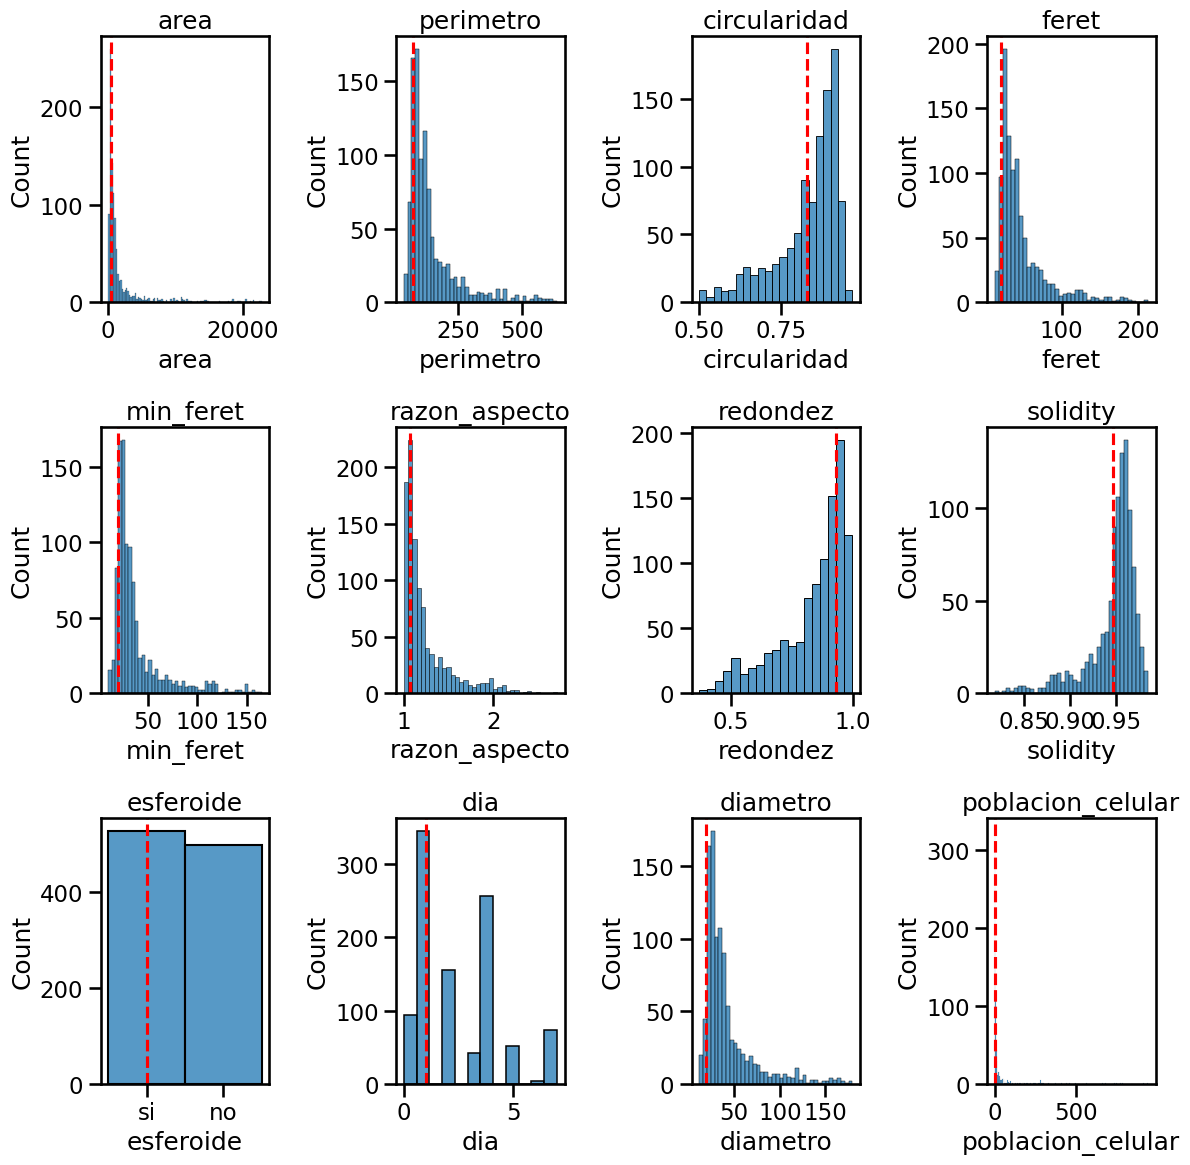

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_variables = len(data_sin_duplicados.columns)

# Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (num_variables - 3) // 4 + 1  # Restamos 2 para excluir la primera columna
num_cols = min(num_variables - 1, 4)  # Restamos 1 para excluir la primera columna

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

# Aplanar la matriz de ejes para que sea iterable
axes = axes.flatten()

# Iterar sobre las columnas numéricas (excluyendo la primera columna) y trazar distribuciones
for i, column in enumerate(data_sin_duplicados.columns[1:]):  # Iniciamos desde la segunda columna
    sns.histplot(data_sin_duplicados[column], ax=axes[i])
    axes[i].set_title(column)

    # Agregar una línea vertical que represente el modo de la variable
    mode = data_sin_duplicados[column].mode().values[0]
    axes[i].axvline(x=mode, color='r', linestyle='--')

        # Establecer los límites del eje y para cada subplot
    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(0, ymax)  # Ajusta la altura en y según tus necesidades

# Eliminar los subplots no utilizados
for j in range(num_variables - 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

Del gráfico anterior se puede observar que:

- `area` y `poblacion_celular` tienen valores muy dispersos.
- Por la distribución de los datos, se ve que la mayoría de los features presentan distribución asimétrica (sesgada) positiva/negativa.
- Definitivamente se requiere limpiar **outliers** en `area` y `poblacion_celular`.

In [227]:
data_df = data_sin_duplicados.copy(deep=True)

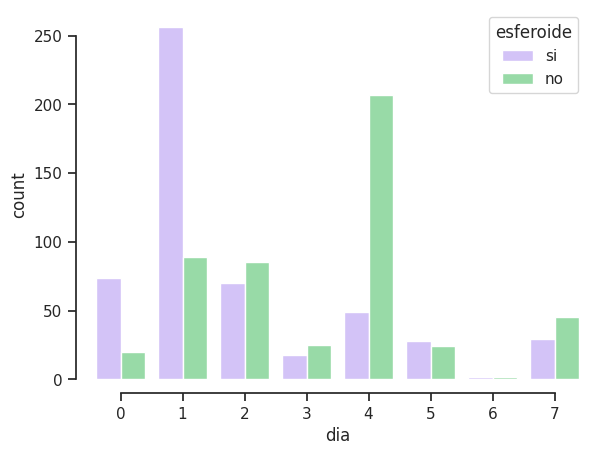

In [228]:
sns.set_theme(style="ticks", palette="pastel")
datos_por_dia = data_sin_duplicados['dia'].value_counts().reindex(range(1, 9), fill_value=0).sort_index()
sns.countplot(x='dia', hue='esferoide', data=data_df, palette=["m", "g"])
sns.despine(offset=10, trim=True)
plt.show()

Observemos la cardinalidad de la variable día:

In [229]:
print('Cardinalidad:', data_df['dia'].nunique())
print()
print('Cuentas para cada día:')
print(data_df['dia'].value_counts())
print()
print('Cuentas en porcentaje para cada día:')
print(100*data_df['dia'].value_counts(normalize=True).iloc[:10])

Cardinalidad: 8

Cuentas para cada día:
1    345
4    256
2    155
0     94
7     74
5     52
3     43
6      4
Name: dia, dtype: int64

Cuentas en porcentaje para cada día:
1    33.724340
4    25.024438
2    15.151515
0     9.188661
7     7.233627
5     5.083089
3     4.203324
6     0.391007
Name: dia, dtype: float64


Del gráfico y la celda anterior se observa que en los días 3,5 y 6 representan menos del 10% de los datos totales y posiblemente al remover algunos outlier, ese porcentaje va a ser mucho menor y nos quedaremos sin datos en esos días.


##### Boxplot

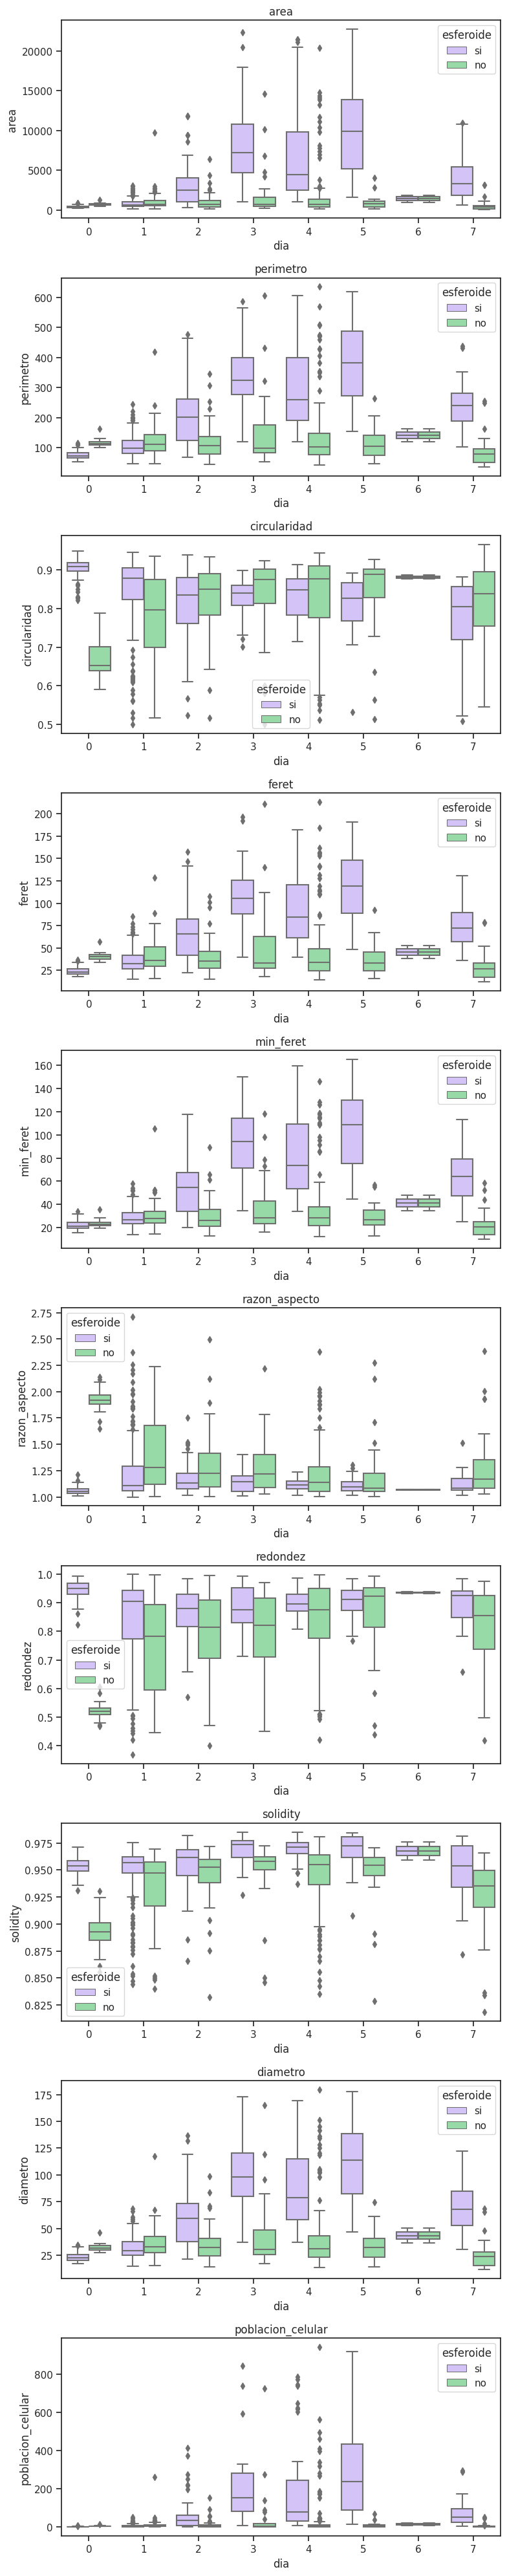

In [230]:
# ==============================================================================
# Ver distribución por Boxplot
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

# Define tus columnas y datos
columns = ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez',
           'solidity', 'diametro', 'poblacion_celular']

# Configurar el tamaño de la figura y los subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4*len(columns)))

# Iterar sobre las columnas y crear los gráficos de caja en los subplots correspondientes
for i, col in enumerate(columns):
    ax = axes[i]  # Obtener el subplot correspondiente
    sns.boxplot(y=col, x="dia", hue='esferoide', data=data_df, palette=["m", "g"], ax=ax)
    ax.set_title(col)  # Establecer el título del subplot

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

En los boxplot se evidencia mucho más la falta presencia de datos outliers.

**[Lu]**

(En los boxplot se evidencia mucho más la falta (de datos por día) y (la) presencia de datos outliers.)

**[Lu]**

TRATAMIENTO de outliers:

- Una opción podría ser apicar rango intercuartílico
- Otra aplicar filtros a valor determinado, es decir, quedarse con valores menores o mayores a determinado valor.

El problema de aplicar estas estrategias en esta base de datos es que los datos con los que contamos son pocos y si removemos outliers puede ser un problema porque estaremos sacando más datos que podrían servir en el objetivo final ideal, que sería generar un programa que permita identificar automáticamente si se trata de una tumoresfera o no. Por lo tanto, una opción prodría ser probar qué pasa si los borramos, entrenar un modelo, testearlo y evaluar los parámetros de ajustes en regresiones polinólicas de diferente grado y ver qué cómo se comparto los Errores Medios Cuadráticos cuando removemos o no los outliers, es decir si se produce sobreajuste o subajuste, y esto se puede aplicar a los diferentes estrategias que se elijan para remover outliers.

#### Remover outliers

Por ahora para efectos de ejercicio procedemos a remover outlier por rango intercuartílico (IQR)

In [231]:
import pandas as pd
import numpy as np
# ==============================================================================
# Función para obtener remover valores atípicos usando el método de rango intercuartílico (IQR)
# ==============================================================================
def remove_outliers_iqr(dataframe, column_name, lower_bound=0.25, upper_bound=0.75):
   # Calcular el rango IQR
    q1 = dataframe[column_name].quantile(lower_bound)
    q3 = dataframe[column_name].quantile(upper_bound)
    iqr = q3 - q1

    # Definir los límites inferior y superior para los valores atípicos
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filtrar los valores atípicos
    filtered_data = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    return filtered_data

In [232]:
###Remover outliers
df_clean = remove_outliers_iqr(data_df, 'poblacion_celular')
df_clean = remove_outliers_iqr(df_clean, 'area')

print(data_df.shape)
print(df_clean.shape)
df_clean.isnull().sum()

(1023, 13)
(817, 13)


nombre_id            0
area                 0
perimetro            0
circularidad         0
feret                0
min_feret            0
razon_aspecto        0
redondez             0
solidity             0
esferoide            0
dia                  0
diametro             0
poblacion_celular    0
dtype: int64

Después de remover los outlier, volvemos a a ver las distribuciones en los boxplot y ahora area y poblacion_celular se dispuede ver mejor la distribución a en los diferentes días. Notar que

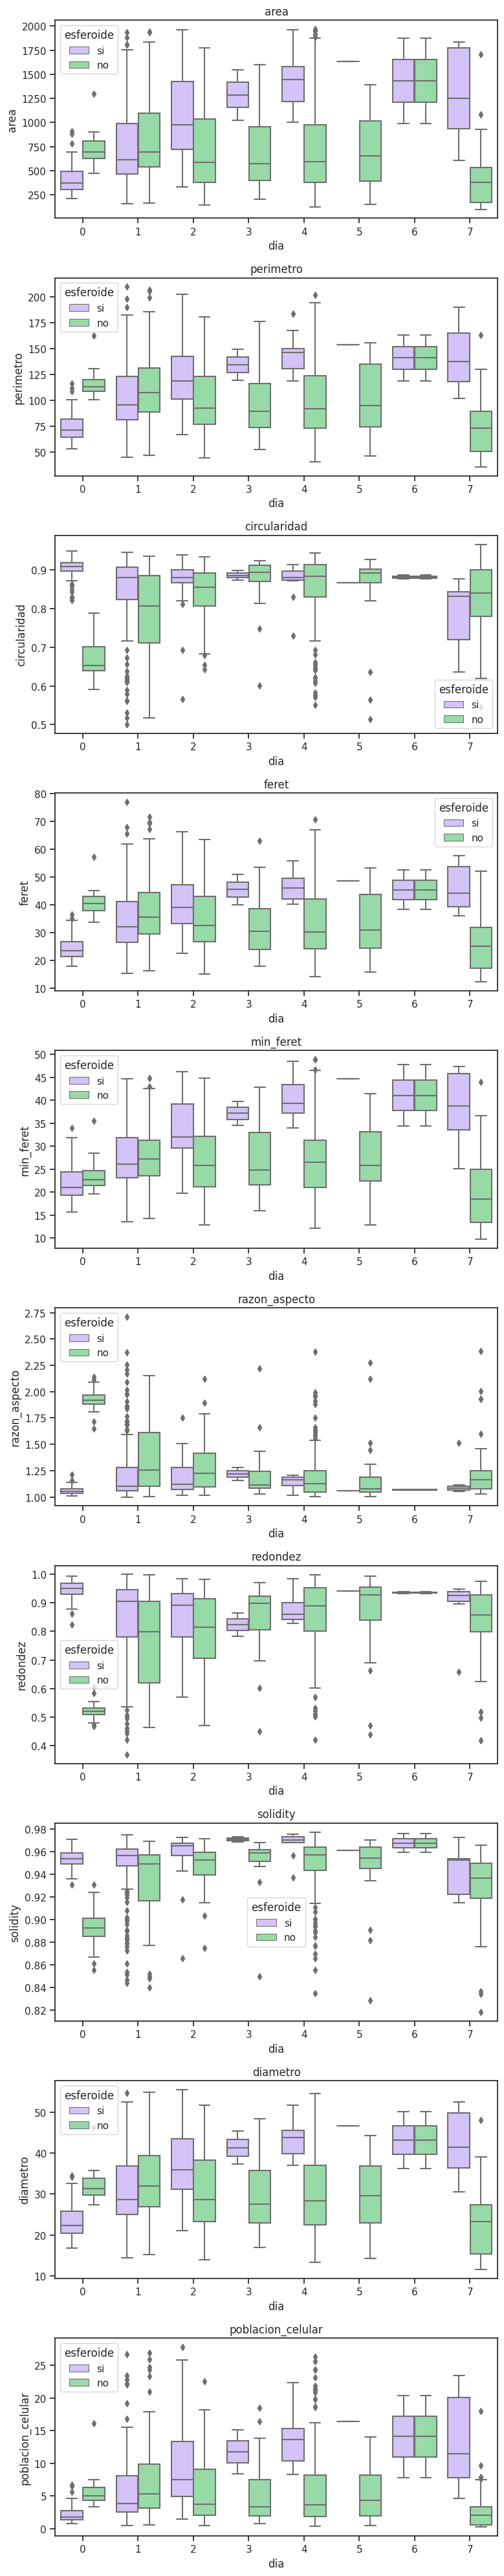

In [233]:
# ==============================================================================
# Ver distribución por Boxplot
# ==============================================================================

sns.set_theme(style="ticks", palette="pastel")

# Define tus columnas y datos
columns = ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto',
           'redondez', 'solidity', 'diametro', 'poblacion_celular']

# Configurar el tamaño de la figura y los subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4*len(columns)))

# Iterar sobre las columnas y crear los gráficos de caja en los subplots correspondientes
for i, col in enumerate(columns):
    ax = axes[i]  # Obtener el subplot correspondiente
    sns.boxplot(y=col, x="dia", hue='esferoide', data=df_clean, palette=["m", "g"], ax=ax)
    ax.set_title(col)  # Establecer el título del subplot

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [234]:
##Verificar de nuevo la cardinalidad
print('Cuentas para cada día:')
print(df_clean['dia'].value_counts())
print()
print('Cuentas en porcentaje para cada día:')
print(100*df_clean['dia'].value_counts(normalize=True).iloc[:10])

Cuentas para cada día:
1    330
4    187
2    107
0     94
7     51
5     23
3     21
6      4
Name: dia, dtype: int64

Cuentas en porcentaje para cada día:
1    40.391677
4    22.888617
2    13.096695
0    11.505508
7     6.242350
5     2.815177
3     2.570379
6     0.489596
Name: dia, dtype: float64


**[Lu]**

Como se puede ver en los gráficos, no sería lo mismo la cantidad de outliers por esferoides 'si' y 'no' para los diferentes días. Eliminar todos los outliers sin definir ese label ni el día puede ser que eliminen algún esferoide que para el análisis era muy grande para ese día y en realidad es un esferoide 'si' y hay mayoría 'no' y por eso lo elimina. Y lo que puede ser un outlier para un día, puede no serlo para otro. Si deciden remover los outliers y explorar la perfomance del algoritmo como comentan arriba, debería hacer la distinción de si es un outlier para esa categoría, en ese día.

**[Lu]**


Antes de continuar debemos realizar algunas observaciones que son relevantes al
momento de realizar determinados análisis estadísticos:

---

1. Respecto a la distribución de los datos, éstos se distribuyen asimétricamente, tal como se ve en los histogramas y como se evidenció en el primer entregable por método Quantile-Quantile Normal y Shapiro-Wilks.

2. Con base en algunos datos claves mencionado por el Dr. Luciano durante la reunión virtual, para que una célula se clasifique como tumeresfera = 'si', debe medir cerca de 50 $\mu$m de diámetro, 100 $\mu$m$^2$ de área y 0.3 $\mu$ de circularidad. Lo cual es un muy buen dato para tener en cuenta al momento de ingresar datos a un modelo de clasificación.

3. Por otra parte, por lo general sólo se formarán tumoresferas si las células estan entre los días ~3 a 6 en la fase de crecimiento. Por lo tanto, los días 0,1,2 y 7 son datos no deberíamos considerar para el análisis desde entretada porque no tiene sentido sumistrar datos errones al preprocesado del modelo. Sin embargo, como se trata de un ejercicio, no vamos a elinaminar esos datos ya que si lo hacemos, perdemos cerca del ~72% de los datos y no podríamos y/o no tendría sentido continuar con los ejercicios planteados.


**[Lu]**

También el día 6 porque son pocos datos y las etiquetas están mal

**[Lu]**

---


**[Teorema Central del Límite (TCL)](https://github.com/CodigoMaquina/code/blob/main/estadistica_ciencia_de_datos/teorema_del_limite_central.ipynb)**

Ref. Peter Bruce and Andrew Bruce. Practical Statistics for Data Scientists,   pág. 116.

Ref. [GitHib](https://github.com/sukhdev01/Central-Limit-Theorem/blob/master/Central_Limit_Theorem.ipynb)


El Teorema Central del Límite (TCL) establece que, cuando se tiene una muestra grande de variables aleatorias independientes e idénticamente distribuidas (IID), **la distribución de la suma o el promedio de esas variables** se aproxima a una distribución normal.


Bajo las condiciones adecuadas del TCL, a medida que el tamaño de la muestra aumenta, la distribución de la suma o el promedio se aproxima cada vez más a una distribución normal. Esto significa que, a medida que el tamaño de la muestra aumenta, la distribución de la suma o el promedio se vuelve más simétrica y se ajusta mejor a una distribución normal.


Con base en el TCL asumimos que la distribución de la media los features que vimos anteriormente no se distribuyen normalmente, asumiremos que sus medias sí lo hacen ya que el tamaño muestral es lo suficientemente grande.

**[Lu]**

Muchas gracias por este aporte!!!

**[Lu]**


### 4) Una vez que recuperan el dataset original, repasando lo que les dieron en la materia de *Exploración y Curación de datos* y ya pensando en las transformaciones que puedan servirles y que les conviene realizar para la clasificación en el práctico de aprendizaje supervisado:

  * ¿Sobre cuáles columnas realizarían encoding y de qué tipo?. Elegir un método e implementarlo.

  * Tenemos muchas columnas (¡aunque siempre puede haber mas!) por lo que es posible realizar algún método de reducción de dimensionalidad.

  * Escalar y/o normalizar? Esa es la cuestión. Teniendo en cuenta lo aprendido a partir de los datos, cuál método se ajustaría a estos datos?

  Sumar tales transformaciones como columnas para sumar características al conjunto de datos y guardar el achivo modificado.

Si se traban mucho mucho en la limpieza de los datos, este paso pueden hacerlo con el dataset original que usaron en el práctico 1.

Ahora ya tenemos el df_clean, procedemos a eliminar la etiqueta `nombre_id` tal como se mencionó anteriormente.

In [ ]:
df_final = df_clean.copy(deep=True)
df_final.drop([ 'nombre_id' ], axis=1, inplace=True)

In [ ]:
##Ver la única variable categórica
print(df_final.select_dtypes(include=['object', 'category']))

    esferoide
0          si
1          si
2          si
3          no
4          si
..        ...
111        no
112        no
113        no
114        no
115        no

[817 rows x 1 columns]


#### Onehot encoding

Como se sabe los algoritmos de ML difícilmente trabajan con variables categórcias, [la mayoría procesan solo variables numéricas](https://www.mygreatlearning.com/blog/label-encoding-in-python/) por tanto, debemos pasar aquellas que sean categóricas a numéricas y para ellos podemos usar tres estrategias conocidas:

- Label Encoding: Asigna un número de 0 a *n*-1 clases/categorias y la escala 0 a n-1 no tiene peso.
- One-Hot Encoding: Asigna 0 ó 1 a cada clase y lo que se obtiene es una matrix o vector.
- Ordinal Encoding: usado en casos donde se tiene una escala donde el número mayor indica "mejor" que el anterior.


De los métodos anteriores el más usado y recomendado es el One-Hot Encoding porque es el que presente menos sesgo.



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Separate the categorical and numerical columns
categorical_cols = ['esferoide']

# Create a DataFrame with the categorical columns
categorical_data = df_final[categorical_cols]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(categorical_data)

# Get the encoded feature names
feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame with the encoded data and column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)
print(encoded_df.shape)
encoded_df.head()

(817, 2)


,esferoide_no,esferoide_si
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


**[Lu]**

Como 'esferoide' se trata de una variable binaria, el uso de codificación "One-Hot Encoding" (OHE) puede agregar información redundante al conjunto de datos ya que lo que representa el valor 0 en una columna se representa como 1 en la otra. Para utilizar esta variable en un problema de clasificación, se debe eliminar una de las dos columnas para que la otra se convierta en la variable objetivo.

En este caso, el uso de OHE o "Label Encoder" (o solo reemplazar 'si' y 'no' por 0 y1 ) sería equivalente. Lo único es que deberían notar qué valor de la etiqueta se corresponde el 0 y cuál corresponde al 1.


**[Lu]**

In [ ]:
df_nume_cols = df_final.select_dtypes(include=['float64', 'int'])
print(df_nume_cols.shape)
df_nume_cols.head()

(817, 11)


,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,solidity,dia,diametro,poblacion_celular
0,315.6752,65.6036,0.9217,21.5900,20.1583,1.0130,0.9871,0.9513,0,20.87415,1.473866
1,333.6742,67.3603,0.9241,21.9083,19.7011,1.0531,0.9496,0.9557,0,20.80470,1.459204
2,505.3572,85.2847,0.8731,28.1827,25.5245,1.0173,0.9830,0.9387,0,26.85360,3.137900
3,874.1065,130.8776,0.6413,45.0321,25.8152,1.9705,0.5075,0.8983,0,35.42365,7.202967
4,302.7528,64.4780,0.9151,21.5793,19.0217,1.0803,0.9256,0.9473,0,20.30050,1.355663


In [ ]:
df_final_encoded = df_nume_cols.join(encoded_df)
print(df_final_encoded.shape)
df_final_encoded.head()

(817, 13)


,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,solidity,dia,diametro,poblacion_celular,esferoide_no,esferoide_si
0,315.6752,65.6036,0.9217,21.5900,20.1583,1.0130,0.9871,0.9513,0,20.87415,1.473866,0.0,1.0
0,515.5105,94.5625,0.7245,34.7199,19.2591,1.9824,0.5044,0.8990,1,26.98950,3.185782,0.0,1.0
0,526.1254,87.1379,0.8707,30.3358,22.0971,1.3102,0.7633,0.9552,3,26.21645,2.919800,0.0,1.0
0,1956.8171,180.3134,0.7563,55.6609,48.9130,1.1047,0.9052,0.9472,4,52.28695,23.163888,0.0,1.0
0,989.4849,119.0473,0.8774,38.2612,34.3726,1.0725,0.9324,0.9593,6,36.31690,7.761717,0.0,1.0


Ahora tenemos de nuevo el data frame con en mismo número total de rows pero esferoide se ha dividido en 2, _no y _si.

### 5) Pueden identificar sesgos en la toma de los datos o en el etiquetado? Si les parece que es así, cómo sería un experimento o método para mejorarlos?


Acerca de los sesgos se habló anteriormente en el Encoding.

Lo que sí correspondería hacer previo a pasar estos datos a una PCA, una regresión sería escalar todas las variables numéricas, para ellos se recomienda usar la Normalización Z-score, donde cada valor normalizado representa la desviación estándar de cada variable con respecto a su media.



**[Lu]**

Perdón, no entendí porque el OHE tiene menos sesgo.. y si, para usar en un algoritmo de clasificación, para algunos algoritmos es conveniente normalizar o estandarizar los datos.

Pero acá era un poco más de sobre lo que charlamos en la reunión, que quizas estamos orientando la detección de esferoides en el experimiento, o sea, no podemos decir que todos los experimentos *in vitro* de células tumorales se encuentran tumoresferas aisladas o que por una sola observación de un observador por más que sea experto ya está. Tenemos un solo experimento y un solo observador experto, sería genial poder realizar mas mediciones. No quiere decir que podemos solucionarlo, estos son los datos que hay. Pero bueno, al menos, notarlo.


**[Lu]**


### 6) Realizar una documentación técnica de los procesos realizados.

 **Documentación**

El objetivo de este documento es realizar un reporte de todas las operaciones que realizamos para la obtención del conjunto de datos de los entregables de Análisis Exploratorio y Exclusión de Datos.

En primer lugar se importan las librerías necesarias para realizar el trabajo, el cual estará dividido en dos partes:

**1.Agrupaciones**

En una primera instancia se utilizará SQL en Python para explorar los datos del archivo original por medio de queries. Los pasos a seguir son:

a.Cargar el archivo 'data/raw/fiji_datos_0al7mo_labels.csv' a SQLite

b. Verificar que la cantidad de datos cargados sea igual a 1018.

c. Listar las primeras 7 líneas con las columnas 'Area', 'Round' con alias 'redondez', Diameter con alias 'diametro', n_diam con alias poblacion_celular y esferoide.

d. Repetimos el paso anterior pero ahora filtrando por los días 3 y 5.

e. Utilizando GROUP BY de dos columnas contamos cuántas filas hay por dia y luego consultar cuales son esferoides = si

f. Tomando los días a partir del dia 3 consultamos cuantos datos son esferoides si y esferoides no, y cuales tienen un diámetro entre 50 y 200

En un segundo paso se procederá a realizar algunas agrupaciones utilizando Python como:

a. Identificar el tipo de variables

b. Identificar los tipos de variables categóricas y numéricas.

c. Hacer un conteo de los datos de acuerdo a distintas variables como esferoide, area, circ, round.

**2.Análisis y Curación de Datos**

a. Primero se procede a combinar los datasets que fueron separados por día. Este paso fue realizado utilizando SQL y Python. Al utilizar python se pudo notar algunas diferencias entre los datasets que se tienen en cuenta a la hora de unificar las tablas ya que se deben corregir dichas diferencias. También se puede ver que columnas están presentes en cada dataframe y cuáles no.

b.Una vez obtenido el dataset modificado procedemos a eliminar las columnas que consideramos no son relevantes y cambiar los nombres de ciertas variables.

c. Ahora se continúa con la corrección de inconsistencias encontradas para ello:
- Detectar qué filas hay repetidas
- Detectar si hay falta de datos
- Eliminar las filas duplicadas
- Verificar si hay valores nulos

d. Se procede a elegir el método de imputación más adecuado, en este caso elegimos utilizar una imputación por la media ya que son pocos los datos faltantes.

e. Verificamos si hay valores negativos en el data frame y se procede a imputarlos por su valor absoluto.

f. Se eliminan las columnas que no se consideran que sean tan necesarias para el análisis de datos.

g. Se cambian el nombre de las columnas y se realiza una descripción de los datos

h. Se continua con la visualización de los datos por medio de histogramas, gráficos de caja que permitan realizar un análisis de los datos

i. A partir de los gráficos y el análisis de datos se remueven los outliers por rango intercuartílico

j. Ya con el dataset limpio se procede a codificar la única variable categórica que es la variable esferoide y se hace por medio de OneHotEncoding.

k. Se obtiene un nuevo dataframe con en mismo número total de columnas pero esferoide se ha dividido en 2, _no y _si.




### OPCIONAL

7) Explorar la carpeta *py_folder*. El archivo *main.py* es solo un borrador. Agregar alguna función de transformación en el módulo de eda y que puedan ejecutarla corriendo el archivo.

 Para correr el archivo main, en una terminal:

    (.venv) $ python main.py

 [Pdoc](https://pdoc.dev/) es una elección común para la documentación en Python. Para usarlo en este proyecto (está un poco personalizado):

    1) Instalarlo:
       (.venv) $ pip install pdoc
    2) Crear la carpeta con la documentación
       (.venv) $ pdoc main.py utils/ -o ./documentacion/Docs -t ./documentacion/pdoc_templates/


In [ ]:
!pip install pdoc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/Colab Notebooks/Mentoria"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
cd drive/MyDrive/Colab Notebooks/Mentoria

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/Mentoria'
/content/drive/MyDrive/Colab Notebooks/Mentoria


In [ ]:
!pdoc main.py utils/ -o ./documentacion/Docs -t ./documentacion/pdoc_templates/